# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Input, Flatten, Concatenate, Add

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
import matplotlib.dates as mdates

## Final Data Prepare

In [ ]:
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/same_final.csv')
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/int_final.csv')

In [ ]:
same_df['Date'] = pd.to_datetime(same_df['Date'])
int_df['Date'] = pd.to_datetime(int_df['Date'])

In [ ]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_df[boolean_columns] = same_df[boolean_columns].astype(bool)
int_df[boolean_columns] = int_df[boolean_columns].astype(bool)

# Set Index
same_df.set_index('Date', inplace = True)
int_df.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

x_train_same = same_df[features][:3518].values
y_train_same = same_df[target][:3518].values

x_val_same = same_df[features][3518:4691].values
y_val_same = same_df[target][3518:4691].values

x_test_same = same_df[features][4691:].values
y_test_same = same_df[target][4691:].values

x_scaler_same_df, y_scaler_same_df = MinMaxScaler(), MinMaxScaler()

x_train_same = x_scaler_same_df.fit_transform(x_train_same)
y_train_same = y_scaler_same_df.fit_transform(y_train_same.reshape(-1, 1))

x_val_same = x_scaler_same_df.transform(x_val_same)
y_val_same = y_scaler_same_df.transform(y_val_same.reshape(-1, 1))

x_test_same = x_scaler_same_df.transform(x_test_same)
y_test_same = y_scaler_same_df.transform(y_test_same.reshape(-1, 1))

In [ ]:
x_train_int = int_df[features][:3518].values
y_train_int = int_df[target][:3518].values

x_val_int = int_df[features][3518:4691].values
y_val_int = int_df[target][3518:4691].values

x_test_int = int_df[features][4691:].values
y_test_int = int_df[target][4691:].values

x_scaler_int_df, y_scaler_int_df = MinMaxScaler(), MinMaxScaler()

x_train_int = x_scaler_int_df.fit_transform(x_train_int)
y_train_int = y_scaler_int_df.fit_transform(y_train_int.reshape(-1, 1))

x_val_int = x_scaler_int_df.transform(x_val_int)
y_val_int = y_scaler_int_df.transform(y_val_int.reshape(-1, 1))

x_test_int = x_scaler_int_df.transform(x_test_int)
y_test_int = y_scaler_int_df.transform(y_test_int.reshape(-1, 1))

### Feature Selection

In [ ]:
features0_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','US_10',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1']

features0_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'US_10', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_60', 'Lag_90']

In [ ]:
len(features0_int)

17

In [ ]:
selected_x_train_same = same_df[features0_same][:3518].values
selected_y_train_same = same_df[target][:3518].values

selected_x_val_same = same_df[features0_same][3518:4691].values
selected_y_val_same = same_df[target][3518:4691].values

selected_x_test_same = same_df[features0_same][4691:].values
selected_y_test_same = same_df[target][4691:].values

x_scaler_selected_same_df, y_scaler_selected_same_df = MinMaxScaler(), MinMaxScaler()

selected_x_train_same = x_scaler_selected_same_df.fit_transform(selected_x_train_same)
selected_y_train_same = y_scaler_selected_same_df.fit_transform(selected_y_train_same.reshape(-1, 1))

selected_x_val_same = x_scaler_selected_same_df.transform(selected_x_val_same)
selected_y_val_same = y_scaler_selected_same_df.transform(selected_y_val_same.reshape(-1, 1))

selected_x_test_same = x_scaler_selected_same_df.transform(selected_x_test_same)
selected_y_test_same = y_scaler_selected_same_df.transform(selected_y_test_same.reshape(-1, 1))

In [ ]:
selected_x_train_int = int_df[features0_int][:3518].values
selected_y_train_int = int_df[target][:3518].values

selected_x_val_int = int_df[features0_int][3518:4691].values
selected_y_val_int = int_df[target][3518:4691].values

selected_x_test_int = int_df[features0_int][4691:].values
selected_y_test_int = int_df[target][4691:].values

x_scaler_selected_int_df, y_scaler_selected_int_df = MinMaxScaler(), MinMaxScaler()

selected_x_train_int = x_scaler_selected_int_df.fit_transform(selected_x_train_int)
selected_y_train_int = y_scaler_selected_int_df.fit_transform(selected_y_train_int.reshape(-1, 1))

selected_x_val_int = x_scaler_selected_int_df.transform(selected_x_val_int)
selected_y_val_int = y_scaler_selected_int_df.transform(selected_y_val_int.reshape(-1, 1))

selected_x_test_int = x_scaler_selected_int_df.transform(selected_x_test_int)
selected_y_test_int = y_scaler_selected_int_df.transform(selected_y_test_int.reshape(-1, 1))

In [ ]:
selected_x_train_int.shape

(3518, 17)

In [ ]:
print(x_scaler_selected_int_df.n_features_in_)

17


## Without Outlier Process Data Prepare

In [ ]:
same_wo = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/same_no_outlier.csv')
int_wo = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/int_no_outlier.csv')

In [ ]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_wo[boolean_columns] = same_wo[boolean_columns].astype(bool)
int_wo[boolean_columns] = int_wo[boolean_columns].astype(bool)

# Set Index
same_wo.set_index('Date', inplace = True)
int_wo.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

x_train_same_wo = same_wo[features][:3518].values
y_train_same_wo = same_wo[target][:3518].values

x_val_same_wo = same_wo[features][3518:4691].values
y_val_same_wo = same_wo[target][3518:4691].values

x_test_same_wo = same_wo[features][4691:].values
y_test_same_wo = same_wo[target][4691:].values

x_scaler_same_wo, y_scaler_same_wo = MinMaxScaler(), MinMaxScaler()

x_train_same_wo = x_scaler_same_wo.fit_transform(x_train_same_wo)
y_train_same_wo = y_scaler_same_wo.fit_transform(y_train_same_wo.reshape(-1, 1))

x_val_same_wo = x_scaler_same_wo.transform(x_val_same_wo)
y_val_same_wo = y_scaler_same_wo.transform(y_val_same_wo.reshape(-1, 1))

x_test_same_wo = x_scaler_same_wo.transform(x_test_same_wo)
y_test_same_wo = y_scaler_same_wo.transform(y_test_same_wo.reshape(-1, 1))

In [ ]:
x_train_int_wo = int_wo[features][:35188].values
y_train_int_wo = int_wo[target][:3518].values

x_val_int_wo = int_wo[features][3518:4691].values
y_val_int_wo = int_wo[target][3518:4691].values

x_test_int_wo = int_wo[features][4691:].values
y_test_int_wo = int_wo[target][4691:].values

x_scaler_int_wo, y_scaler_int_wo = MinMaxScaler(), MinMaxScaler()

x_train_int_wo = x_scaler_int_wo.fit_transform(x_train_int_wo)
y_train_int_wo = y_scaler_int_wo.fit_transform(y_train_int_wo.reshape(-1, 1))

x_val_int_wo = x_scaler_int_wo.transform(x_val_int_wo)
y_val_int_wo = y_scaler_int_wo.transform(y_val_int_wo.reshape(-1, 1))

x_test_int_wo = x_scaler_int_wo.transform(x_test_int_wo)
y_test_int_wo = y_scaler_int_wo.transform(y_test_int_wo.reshape(-1, 1))

### Feature Selection

In [ ]:
features2_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'WTI', 'Exchange', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30']

features2_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1']

In [ ]:
selected_x_train_same_wo = same_wo[features2_same][:3518].values
selected_y_train_same_wo = same_wo[target][:3518].values

selected_x_val_same_wo = same_wo[features2_same][3518:4691].values
selected_y_val_same_wo = same_wo[target][3518:4691].values

selected_x_test_same_wo = same_wo[features2_same][4691:].values
selected_y_test_same_wo = same_wo[target][4691:].values

x_scaler_selected_same_wo, y_scaler_selected_same_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_same_wo = x_scaler_selected_same_wo.fit_transform(selected_x_train_same_wo)
selected_y_train_same_wo = y_scaler_selected_same_wo.fit_transform(selected_y_train_same_wo.reshape(-1, 1))

selected_x_val_same_wo = x_scaler_selected_same_wo.transform(selected_x_val_same_wo)
selected_y_val_same_wo = y_scaler_selected_same_wo.transform(selected_y_val_same_wo.reshape(-1, 1))

selected_x_test_same_wo = x_scaler_selected_same_wo.transform(selected_x_test_same_wo)
selected_y_test_same_wo = y_scaler_selected_same_wo.transform(selected_y_test_same_wo.reshape(-1, 1))

In [ ]:
selected_x_train_int_wo = int_wo[features2_int][:3518].values
selected_y_train_int_wo = int_wo[target][:3518].values

selected_x_val_int_wo = int_wo[features2_int][3518:4691].values
selected_y_val_int_wo = int_wo[target][3518:4691].values

selected_x_test_int_wo = int_wo[features2_int][4691:].values
selected_y_test_int_wo = int_wo[target][4691:].values

x_scaler_selected_int_wo, y_scaler_selected_int_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_int_wo = x_scaler_selected_int_wo.fit_transform(selected_x_train_int_wo)
selected_y_train_int_wo = y_scaler_selected_int_wo.fit_transform(selected_y_train_int_wo.reshape(-1, 1))

selected_x_val_int_wo = x_scaler_selected_int_wo.transform(selected_x_val_int_wo)
selected_y_val_int_wo = y_scaler_selected_int_wo.transform(selected_y_val_int_wo.reshape(-1, 1))

selected_x_test_int_wo = x_scaler_selected_int_wo.transform(selected_x_test_int_wo)
selected_y_test_int_wo = y_scaler_selected_int_wo.transform(selected_y_test_int_wo.reshape(-1, 1))

In [ ]:
features4_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Foreign','US_10', 'Exchange',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_90']

features4_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1']

# Model Setting

In [ ]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 45.0 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
import wandb
from wandb.integration.keras import WandbCallback

In [ ]:
wandb.login(key='b0f579d1228ea5f3cfac162435df78243cadca62')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yebin. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is set to be used.")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")
else:
    print("No GPU found. Using CPU instead.")

GPU is set to be used.


In [ ]:
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i+time_steps])
        labels.append(y[i+time_steps])
    return np.array(sequences), np.array(labels)

def rmse_metric(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        self.V = self.add_weight(name='attention_score', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)

    def call(self, inputs):
        # Attention mechanism
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.V, axes=1), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

In [ ]:
class MultiHeadAttentionLayer(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(MultiHeadAttentionLayer, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)

    def call(self, query, value):
        return self.attention(query=query, value=value, key=value)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터할 지표 (예: 'val_loss' 또는 'val_rmse')
    patience=5,          # 성능 향상이 없는 epoch 수 (5번 동안 개선 없으면 중단)
    restore_best_weights=True,  # 가장 성능이 좋은 가중치를 복원
    mode = 'min'
    #verbose=1            # 로그 출력 여부
)

# Final - Int

##### 24

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper24", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper24.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=5, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(32, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper24 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper24.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper24.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper24.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper24.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 0.4725 - mse: 0.1055 - val_loss: 0.3885 - val_mse: 0.0403 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3466 - mse: 0.0048 - val_loss: 0.3476 - val_mse: 0.0249 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3190 - mse: 0.0025 - val_loss: 0.3227 - val_mse: 0.0243 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2942 - mse: 0.0017 - val_loss: 0.3007 - val_mse: 0.0253 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2714 - mse: 0.0015 - val_loss: 0.2802 - val_mse: 0.0262 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2502 - mse: 0.0012 - val_loss: 0.2607 - val_mse: 0.0266 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2305 - mse: 0.0011 - val_loss: 0.2418 - val_mse: 0.0261 - lea

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 86, 64)         │          5,504 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 43, 64)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 43, 64)         │         33,024 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ (None, 32)             │         12,416 │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          2,112 │ lstm_5[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 43, 64)         │              0 │ lstm_4[0][0],          │
│                           │                        │                │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 43, 32)         │          2,080 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 43, 1)          │             33 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 165,509 (646.52 KB)

 Trainable params: 55,169 (215.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 110,340 (431.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


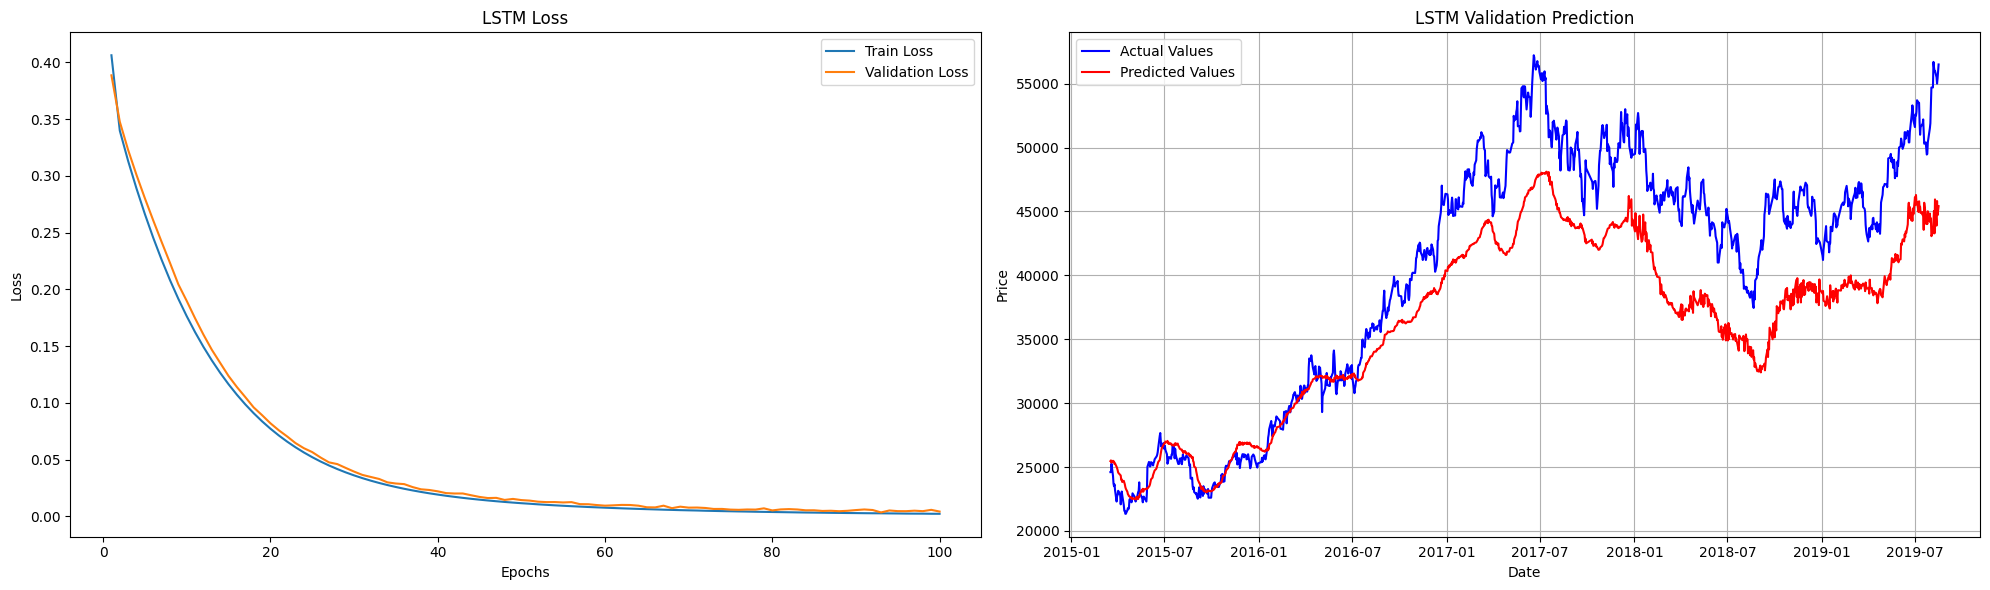

Before Inverse Scaling
MAE: 4483.0392
MSE: 29876732.6871
RMSE: 5465.9613
R²: 0.6963
--------------------
After Inverse Scaling
MAE: 0.0442
MSE: 0.0028
RMSE: 0.0525
R²: 0.7861
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


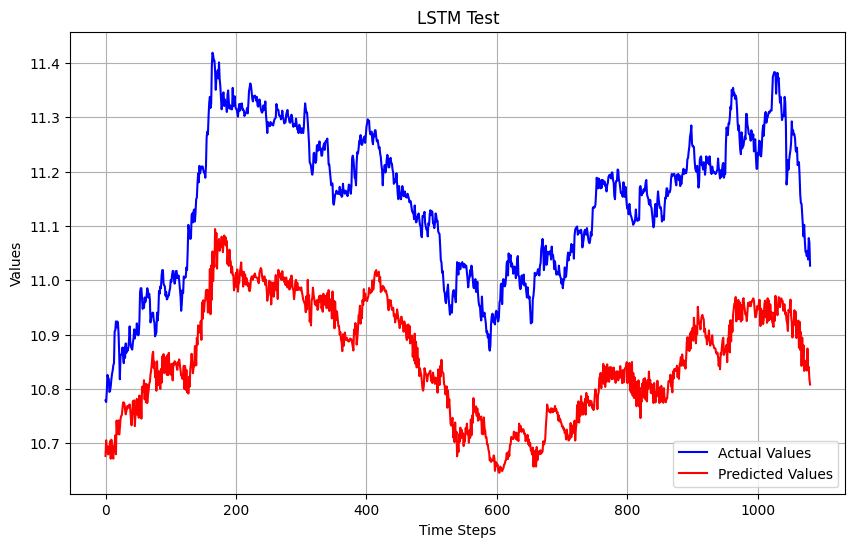

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper24.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper24.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 25

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper25", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper25.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=7, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(32, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper25 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper25.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper25.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper25.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper25.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4264 - mse: 0.1425 - val_loss: 0.3350 - val_mse: 0.0638 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2749 - mse: 0.0081 - val_loss: 0.2802 - val_mse: 0.0267 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2510 - mse: 0.0018 - val_loss: 0.2597 - val_mse: 0.0234 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2332 - mse: 0.0011 - val_loss: 0.2414 - val_mse: 0.0215 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2170 - mse: 9.3699e-04 - val_loss: 0.2286 - val_mse: 0.0241 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2018 - mse: 8.9752e-04 - val_loss: 0.2116 - val_mse: 0.0215 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1875 - mse: 7.8563e-04 - val_loss: 0.1996 - val_mse: 0

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 86, 64)         │          5,504 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 43, 64)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 43, 64)         │         33,024 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ (None, 32)             │         12,416 │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          2,112 │ lstm_5[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 43, 64)         │              0 │ lstm_4[0][0],          │
│                           │                        │                │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 43, 32)         │          2,080 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 43, 1)          │             33 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 165,509 (646.52 KB)

 Trainable params: 55,169 (215.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 110,340 (431.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


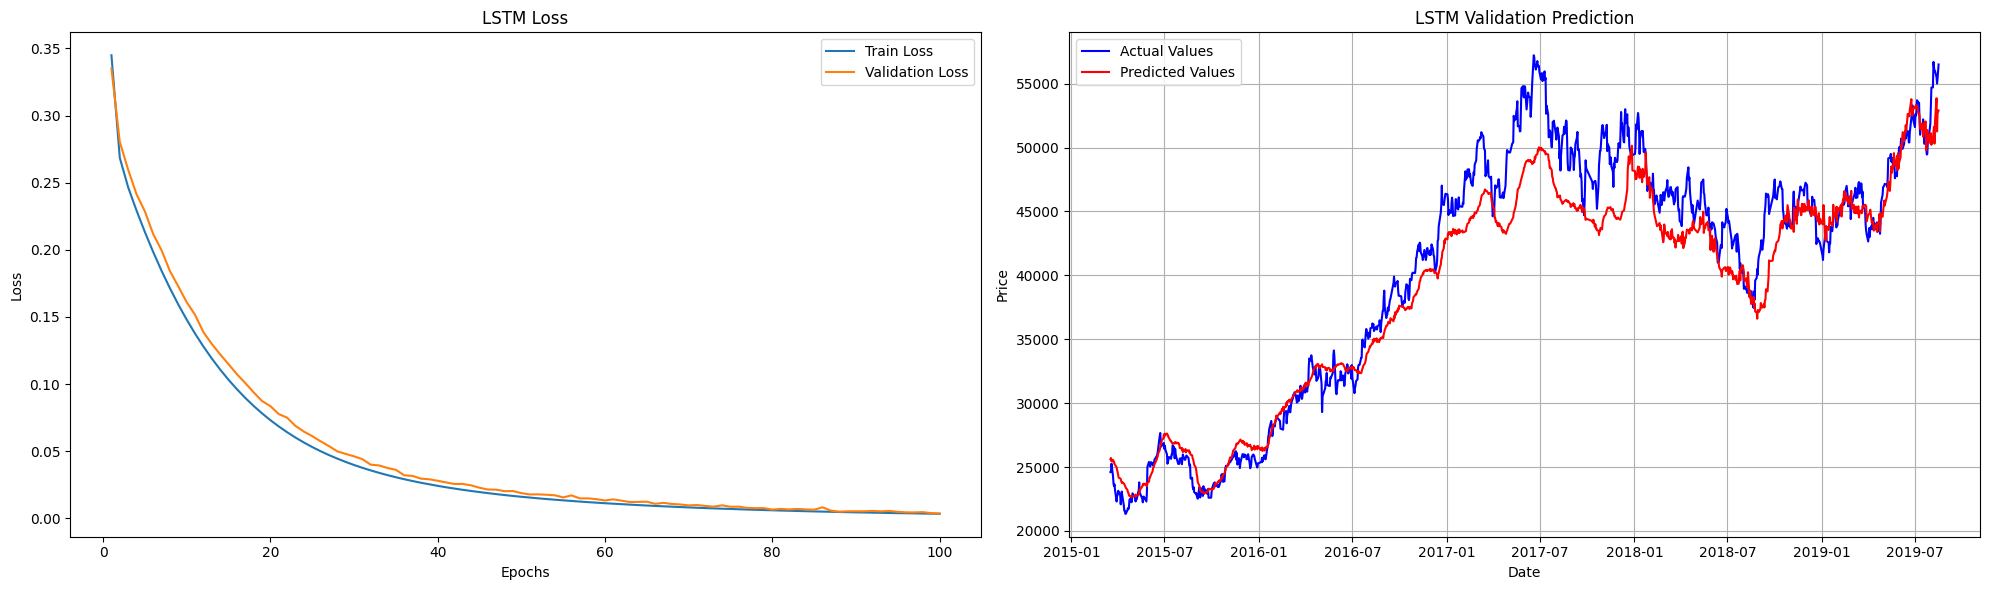

Before Inverse Scaling
MAE: 2023.0438
MSE: 7351975.2925
RMSE: 2711.4526
R²: 0.9253
--------------------
After Inverse Scaling
MAE: 0.0199
MSE: 0.0006
RMSE: 0.0252
R²: 0.9507
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


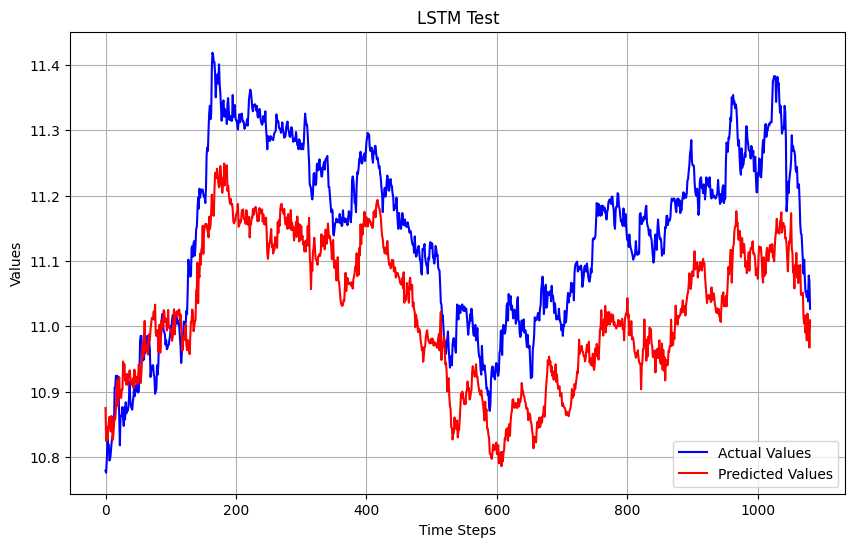

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper25.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper25.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 26

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper26", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper26.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=7, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(32, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper26 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper26.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper26.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper26.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper26.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3792 - mse: 0.1930 - val_loss: 0.1974 - val_mse: 0.0179 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1816 - mse: 0.0045 - val_loss: 0.1828 - val_mse: 0.0129 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.1699 - mse: 0.0025 - val_loss: 0.1686 - val_mse: 0.0083 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1599 - mse: 0.0020 - val_loss: 0.1573 - val_mse: 0.0063 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1503 - mse: 0.0015 - val_loss: 0.1480 - val_mse: 0.0059 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1413 - mse: 0.0013 - val_loss: 0.1393 - val_mse: 0.0057 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1328 - mse: 0.0011 - val_loss: 0.1318 - val_mse: 0.0061 - lear

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 84, 64)         │          7,680 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 42, 64)         │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ (None, 42, 64)         │         33,024 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_9 (LSTM)             │ (None, 32)             │         12,416 │ lstm_8[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 64)             │          2,112 │ lstm_9[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 42, 64)         │              0 │ lstm_8[0][0],          │
│                           │                        │                │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 42, 32)         │          2,080 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 42, 1)          │             33 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 172,037 (672.02 KB)

 Trainable params: 57,345 (224.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 114,692 (448.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


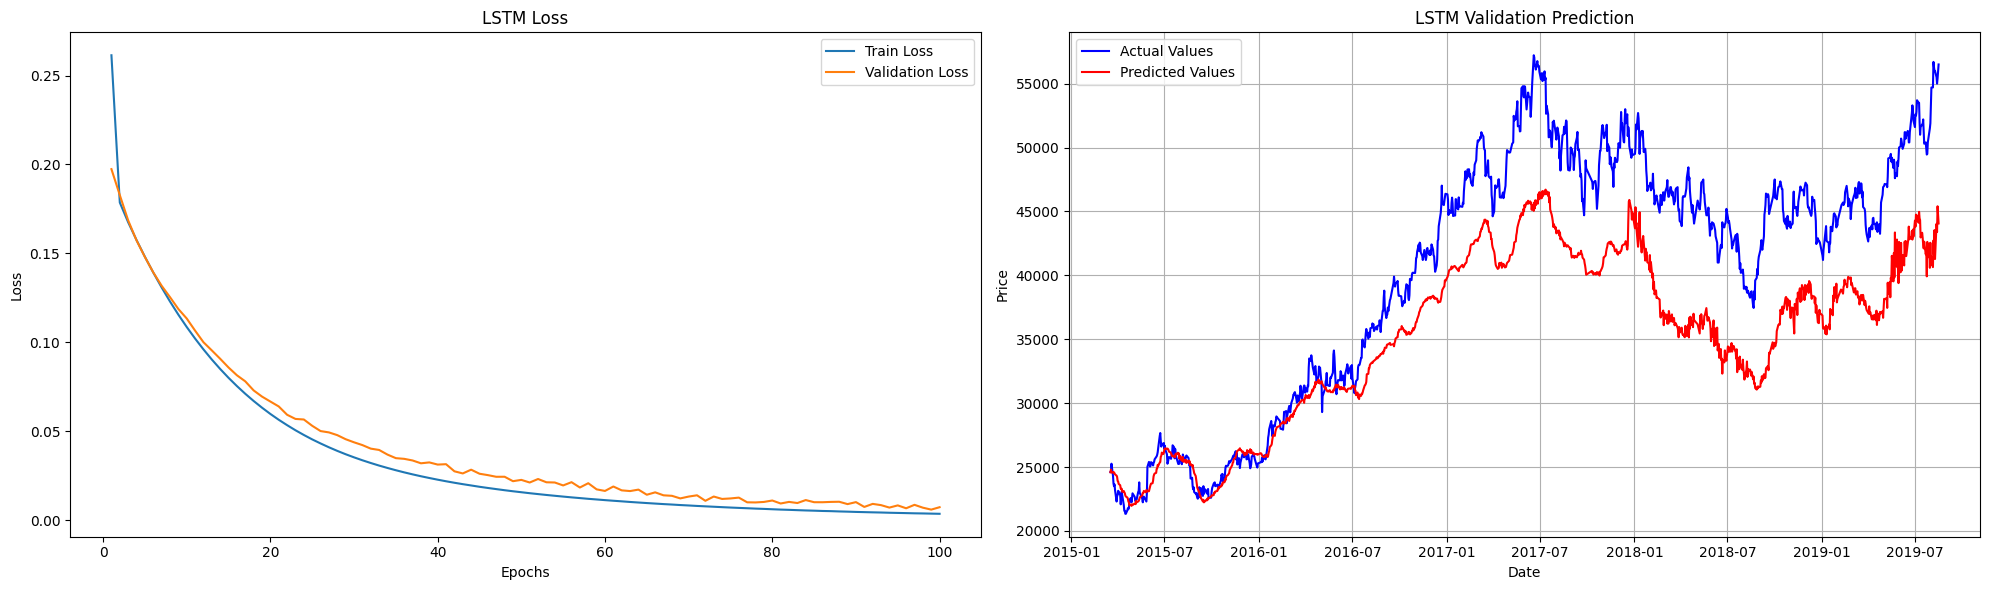

Before Inverse Scaling
MAE: 5306.0828
MSE: 41350875.3899
RMSE: 6430.4646
R²: 0.5797
--------------------
After Inverse Scaling
MAE: 0.0528
MSE: 0.0039
RMSE: 0.0626
R²: 0.6956
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


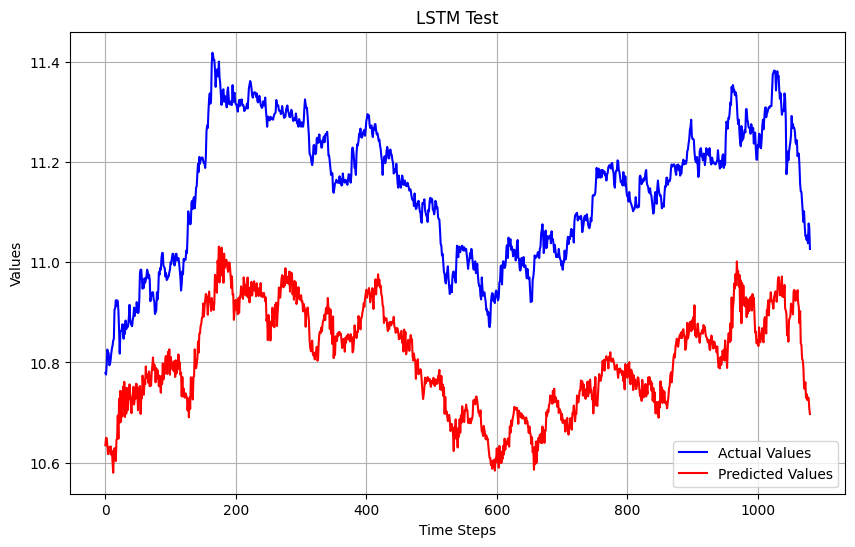

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper26.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper26.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 27

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper27", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper27.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=7, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(32, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper27 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper27.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper27.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper27.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper27.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.3829 - mse: 0.1027 - val_loss: 0.2857 - val_mse: 0.0295 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2500 - mse: 0.0018 - val_loss: 0.2518 - val_mse: 0.0272 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2185 - mse: 0.0012 - val_loss: 0.2181 - val_mse: 0.0221 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.1905 - mse: 9.1980e-04 - val_loss: 0.1884 - val_mse: 0.0175 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1660 - mse: 7.6574e-04 - val_loss: 0.1641 - val_mse: 0.0152 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1446 - mse: 6.7539e-04 - val_loss: 0.1432 - val_mse: 0.0135 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1261 - mse: 5.9707e-04 - val_loss: 

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 84, 64)         │          7,680 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 42, 64)         │              0 │ conv1d_5[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_10 (LSTM)            │ (None, 42, 64)         │         33,024 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_11 (LSTM)            │ (None, 32)             │         12,416 │ lstm_10[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 64)             │          2,112 │ lstm_11[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 42, 64)         │              0 │ lstm_10[0][0],         │
│                           │                        │                │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 42, 32)         │          2,080 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 42, 1)          │             33 │ dense_13[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 172,037 (672.02 KB)

 Trainable params: 57,345 (224.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 114,692 (448.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


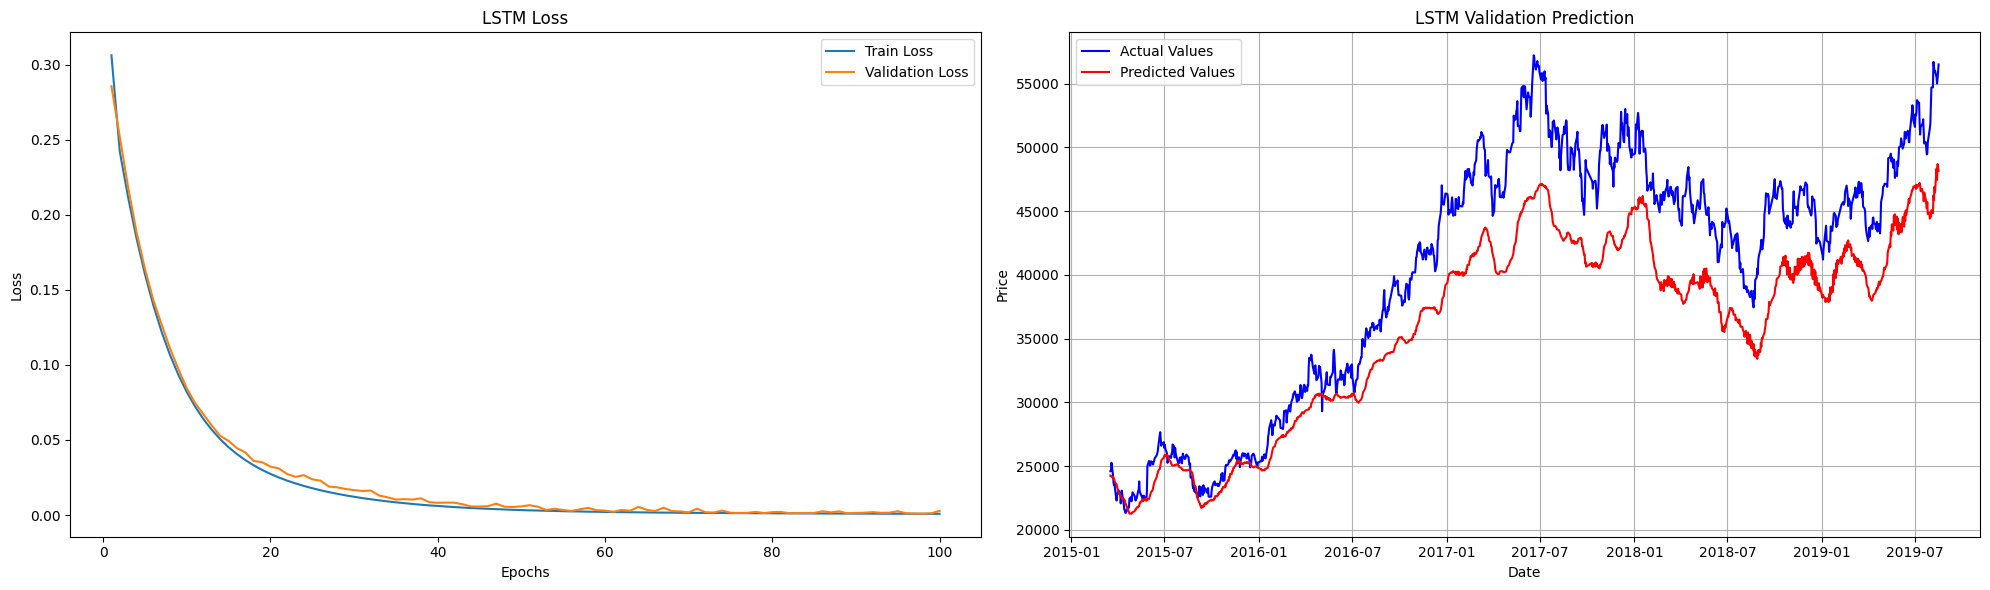

Before Inverse Scaling
MAE: 4471.0018
MSE: 27236626.1400
RMSE: 5218.8721
R²: 0.7232
--------------------
After Inverse Scaling
MAE: 0.0446
MSE: 0.0025
RMSE: 0.0499
R²: 0.8062
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


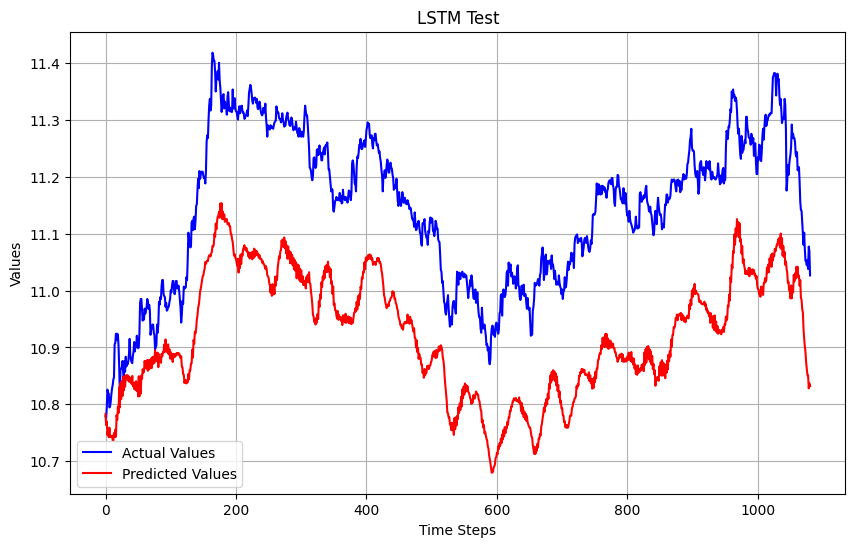

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper27.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper27.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 28

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper28", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper28.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=7, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(32, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper28 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper28.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper28.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper28.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper28.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.7209 - mse: 0.3290 - val_loss: 0.3834 - val_mse: 0.0132 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3685 - mse: 0.0059 - val_loss: 0.3481 - val_mse: 0.0084 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3345 - mse: 0.0021 - val_loss: 0.3151 - val_mse: 0.0042 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3054 - mse: 0.0014 - val_loss: 0.2895 - val_mse: 0.0055 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2788 - mse: 0.0011 - val_loss: 0.2662 - val_mse: 0.0068 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2546 - mse: 0.0010 - val_loss: 0.2444 - val_mse: 0.0076 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2324 - mse: 8.9503e-04 - val_loss: 0.2244 - val_mse: 0.0082 - 

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 84, 64)         │          7,680 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_6           │ (None, 42, 64)         │              0 │ conv1d_6[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_12 (LSTM)            │ (None, 42, 128)        │         98,816 │ max_pooling1d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_13 (LSTM)            │ (None, 64)             │         49,408 │ lstm_12[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 128)            │          8,320 │ lstm_13[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 42, 128)        │              0 │ lstm_12[0][0],         │
│                           │                        │                │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 42, 32)         │          4,128 │ add_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 42, 1)          │             33 │ dense_16[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 505,157 (1.93 MB)

 Trainable params: 168,385 (657.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,772 (1.28 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


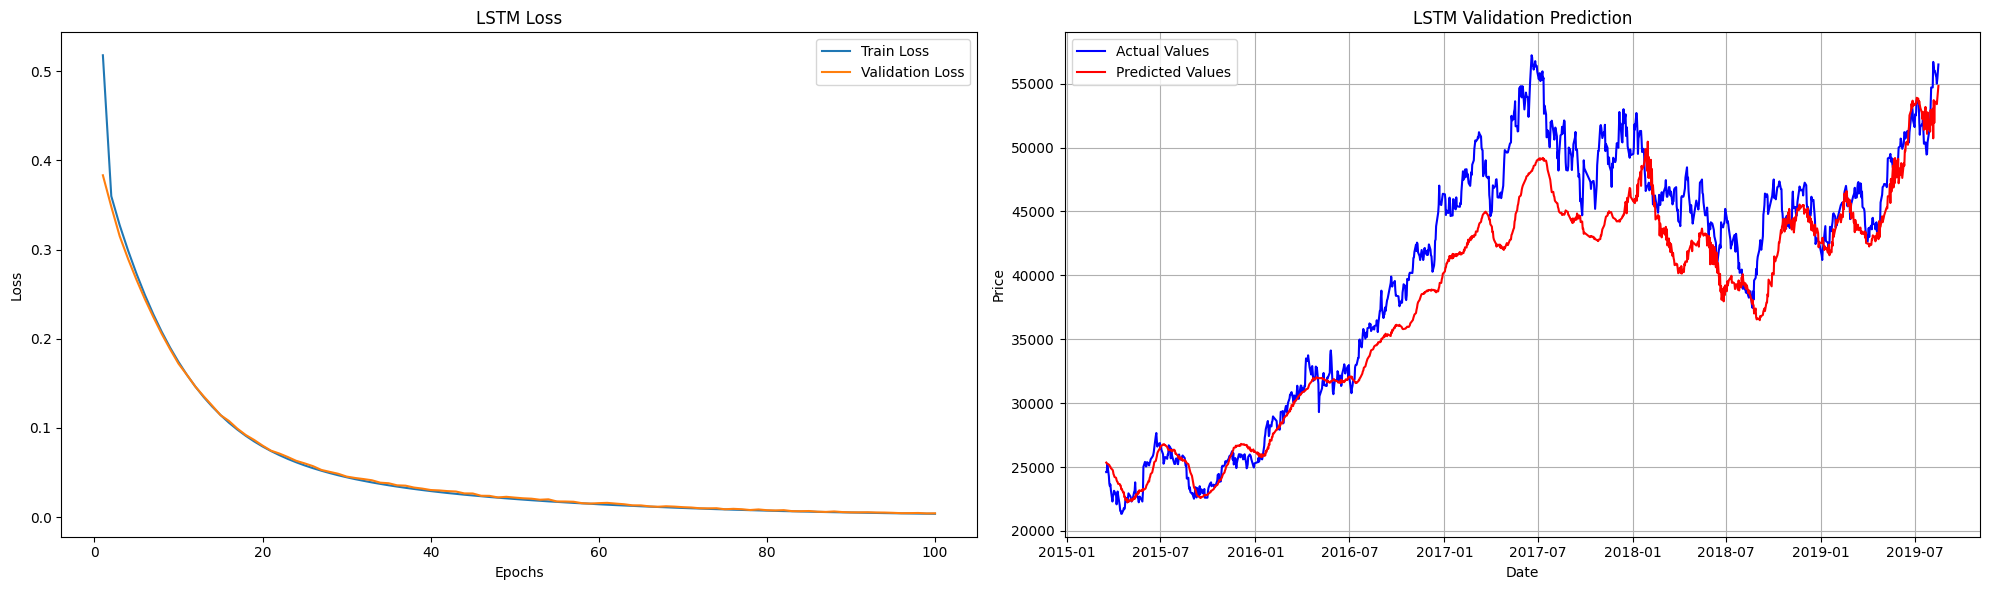

Before Inverse Scaling
MAE: 2601.1515
MSE: 11846642.6965
RMSE: 3441.8952
R²: 0.8796
--------------------
After Inverse Scaling
MAE: 0.0255
MSE: 0.0010
RMSE: 0.0321
R²: 0.9197
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


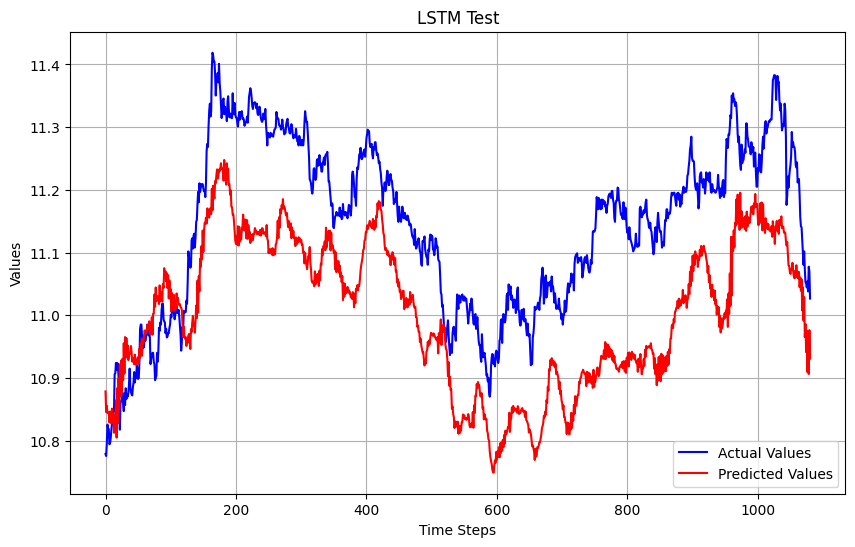

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper28.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper28.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 29

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper29", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper29.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=7, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper29 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper29.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper29.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper29.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper29.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4740 - mse: 0.0848 - val_loss: 0.4551 - val_mse: 0.0923 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3564 - mse: 0.0024 - val_loss: 0.3951 - val_mse: 0.0674 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3209 - mse: 0.0014 - val_loss: 0.3538 - val_mse: 0.0586 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2886 - mse: 0.0011 - val_loss: 0.3194 - val_mse: 0.0540 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2594 - mse: 9.3601e-04 - val_loss: 0.2843 - val_mse: 0.0458 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2330 - mse: 7.8541e-04 - val_loss: 0.2560 - val_mse: 0.0418 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2093 - mse: 7.3582e-04 - val_loss: 0.2274 - val_mse: 0

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 84, 64)         │          7,680 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_7           │ (None, 42, 64)         │              0 │ conv1d_7[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_14 (LSTM)            │ (None, 42, 128)        │         98,816 │ max_pooling1d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_15 (LSTM)            │ (None, 64)             │         49,408 │ lstm_14[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 128)            │          8,320 │ lstm_15[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 42, 128)        │              0 │ lstm_14[0][0],         │
│                           │                        │                │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 42, 64)         │          8,256 │ add_6[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 42, 1)          │             65 │ dense_19[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 517,637 (1.97 MB)

 Trainable params: 172,545 (674.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 345,092 (1.32 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


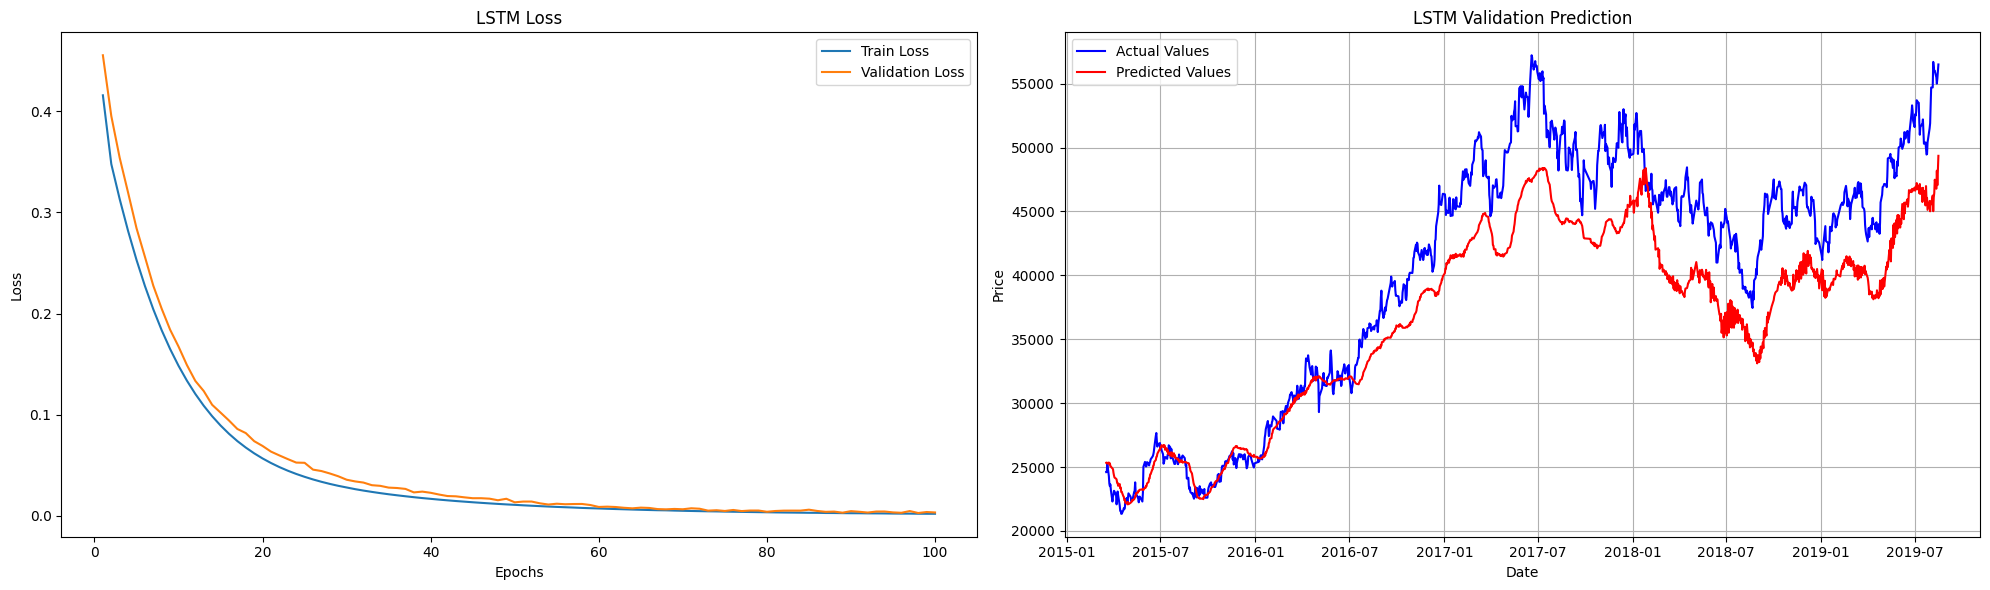

Before Inverse Scaling
MAE: 3866.6103
MSE: 22144458.6719
RMSE: 4705.7899
R²: 0.7749
--------------------
After Inverse Scaling
MAE: 0.0378
MSE: 0.0020
RMSE: 0.0446
R²: 0.8456
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


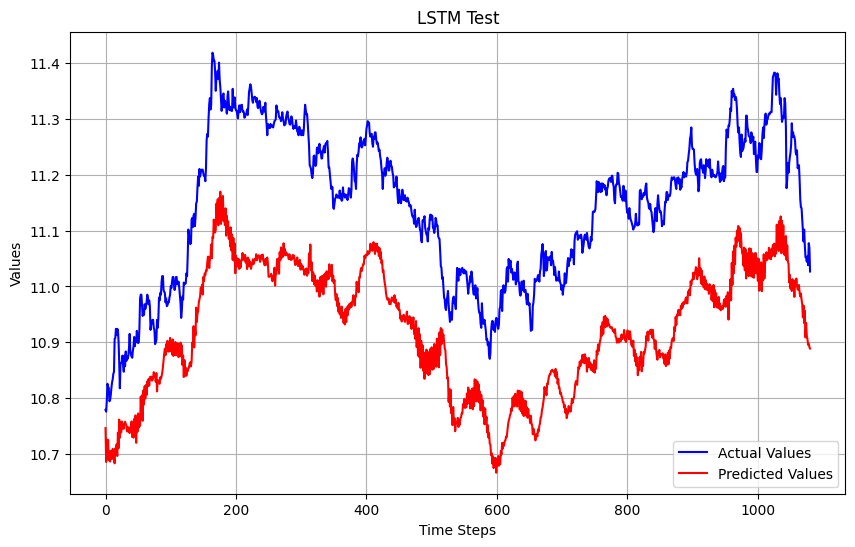

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper29.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper29.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 30

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper30", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper30.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=9, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper30 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper30.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper30.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper30.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper30.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3462 - mse: 0.0666 - val_loss: 0.2790 - val_mse: 0.0171 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2587 - mse: 0.0029 - val_loss: 0.2426 - val_mse: 0.0046 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2334 - mse: 0.0012 - val_loss: 0.2196 - val_mse: 0.0040 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2113 - mse: 9.3229e-04 - val_loss: 0.1985 - val_mse: 0.0034 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1910 - mse: 7.4403e-04 - val_loss: 0.1796 - val_mse: 0.0032 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1727 - mse: 6.8335e-04 - val_loss: 0.1630 - val_mse: 0.0036 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1562 - mse: 6.8064e-04 - val_loss: 0.1470 - val_ms

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 82, 64)         │          9,856 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 41, 64)         │              0 │ conv1d_8[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_16 (LSTM)            │ (None, 41, 128)        │         98,816 │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_17 (LSTM)            │ (None, 64)             │         49,408 │ lstm_16[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 128)            │          8,320 │ lstm_17[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 41, 128)        │              0 │ lstm_16[0][0],         │
│                           │                        │                │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 41, 64)         │          8,256 │ add_7[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 41, 1)          │             65 │ dense_22[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 524,165 (2.00 MB)

 Trainable params: 174,721 (682.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 349,444 (1.33 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


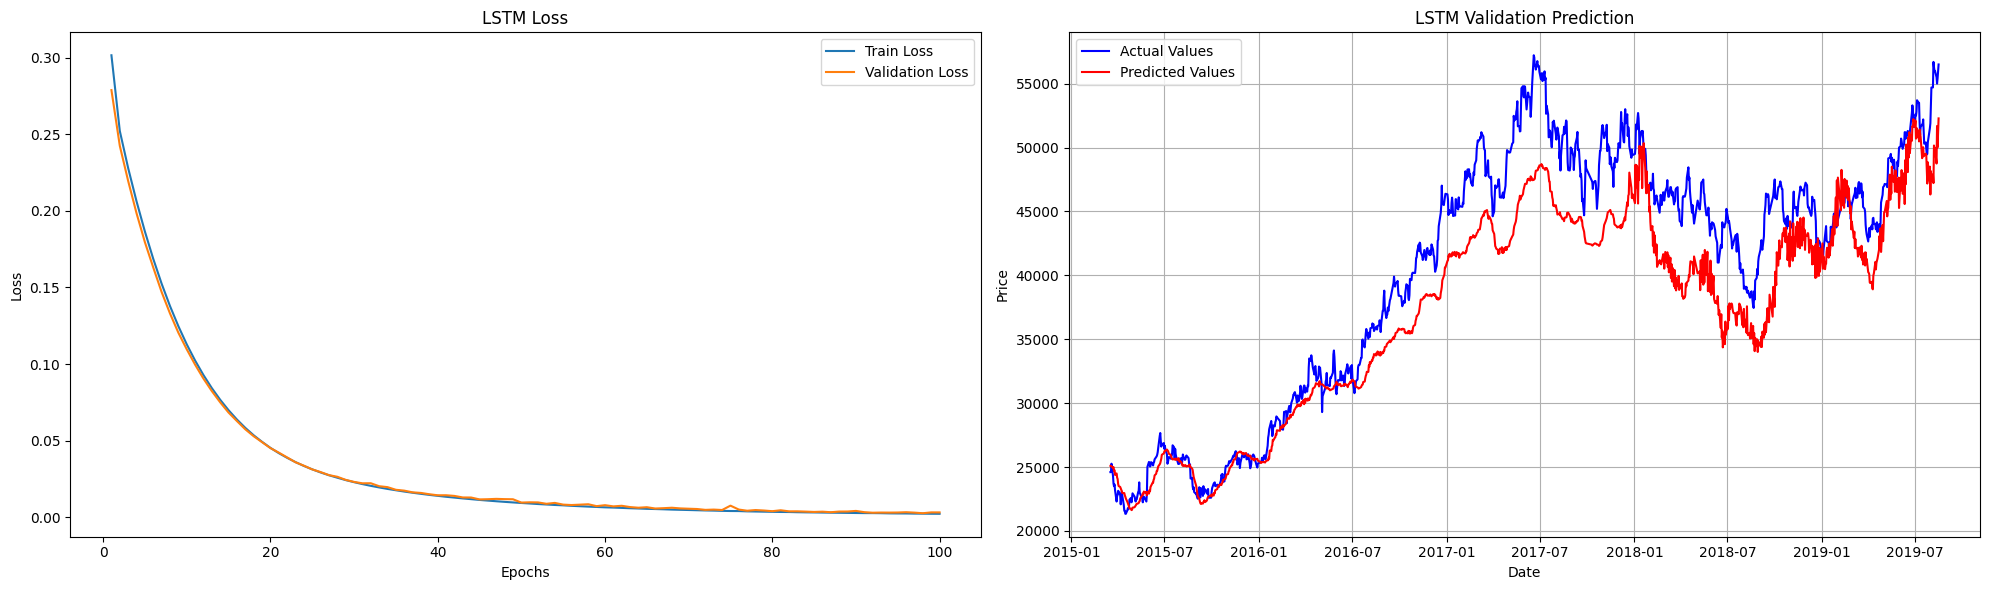

Before Inverse Scaling
MAE: 3223.8973
MSE: 16530141.4470
RMSE: 4065.7277
R²: 0.8320
--------------------
After Inverse Scaling
MAE: 0.0318
MSE: 0.0015
RMSE: 0.0386
R²: 0.8839
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


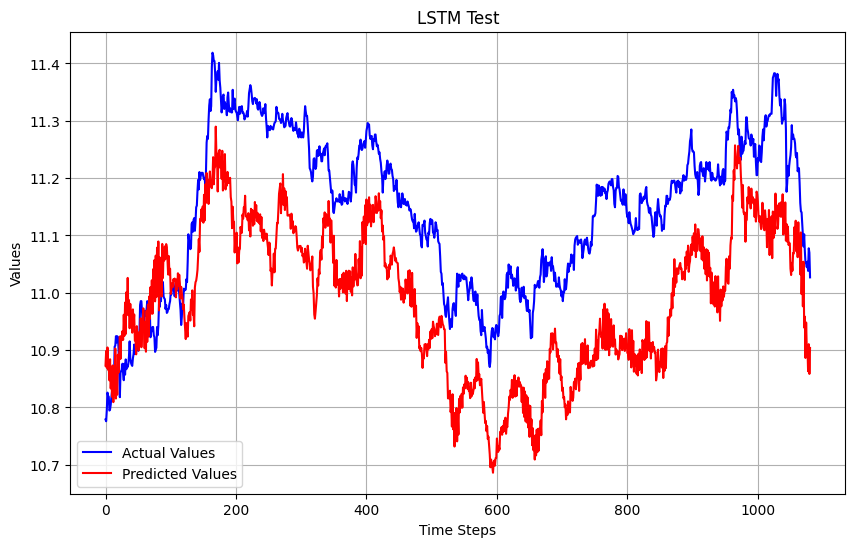

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper30.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper30.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 31

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper30", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128,64,32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper30.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=9, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

lstm3 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(skip2)

lstm3_adjusted = Dense(wandb.config.lstm_units[0])(lstm3)
skip2 = Add()([lstm1, lstm3_adjusted])



dense1 = Dense(32, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper30 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper30.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper30.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper30.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper30.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 0.5945 - mse: 0.1453 - val_loss: 0.4648 - val_mse: 0.0431 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.4166 - mse: 0.0043 - val_loss: 0.4230 - val_mse: 0.0387 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3770 - mse: 0.0017 - val_loss: 0.3840 - val_mse: 0.0349 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3421 - mse: 0.0012 - val_loss: 0.3463 - val_mse: 0.0296 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3102 - mse: 0.0011 - val_loss: 0.3165 - val_mse: 0.0294 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2809 - mse: 8.4571e-04 - val_loss: 0.2883 - val_mse: 0.0283 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2545 - mse: 7.5517e-04 - val_loss: 0.2641 - val_mse: 0.02

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 90, 17)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 82, 64)         │          9,856 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 41, 64)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 41, 128)        │         98,816 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 64)             │         49,408 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │          8,320 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 41, 128)        │              0 │ lstm[0][0],            │
│                           │                        │                │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 64)             │         49,408 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │          8,320 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 41, 128)        │              0 │ lstm[0][0],            │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 41, 32)         │          4,128 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 41, 1)          │             33 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 684,869 (2.61 MB)

 Trainable params: 228,289 (891.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 456,580 (1.74 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


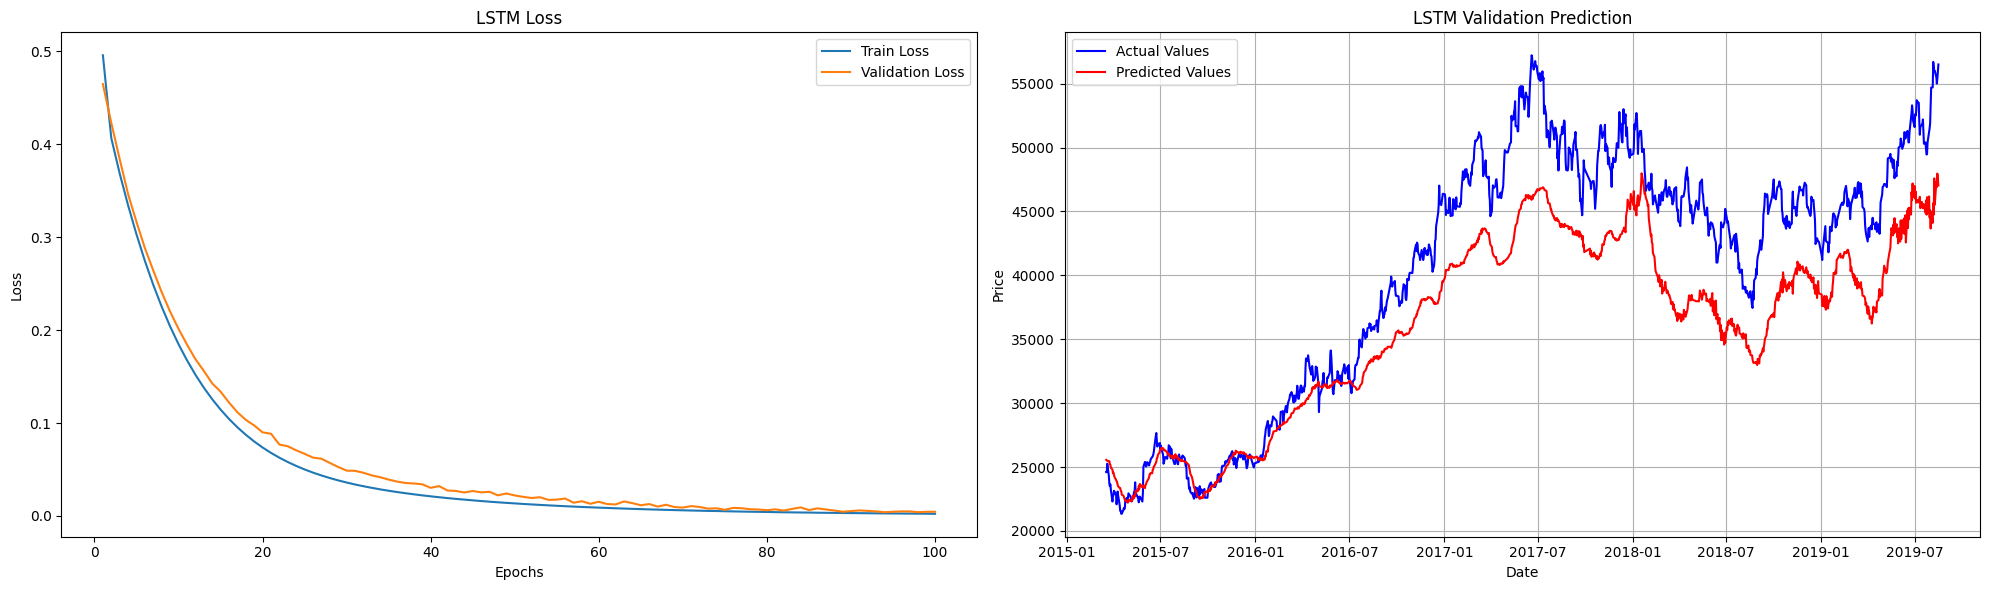

Before Inverse Scaling
MAE: 4436.3156
MSE: 28565805.4438
RMSE: 5344.6988
R²: 0.7097
--------------------
After Inverse Scaling
MAE: 0.0437
MSE: 0.0026
RMSE: 0.0511
R²: 0.7971
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


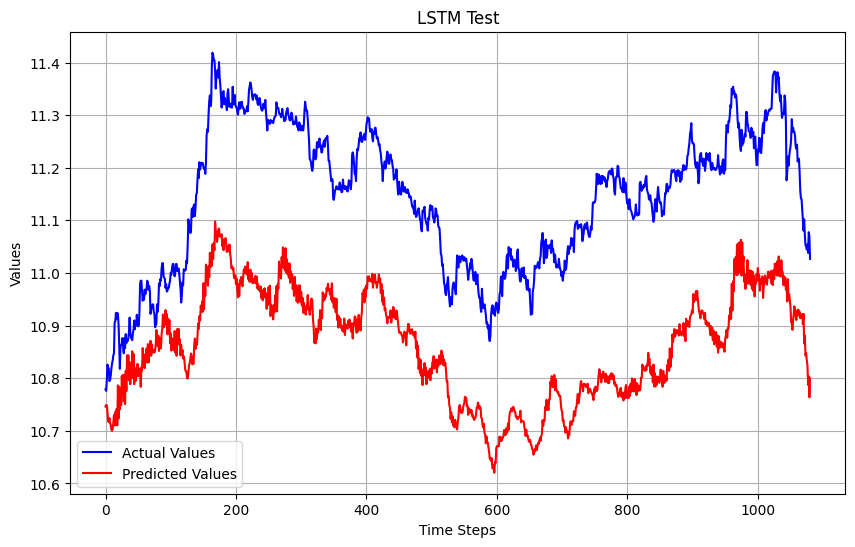

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper30.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper30.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 31

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper31", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128,64,64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper31.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=9, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

lstm3 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(skip2)

lstm3_adjusted = Dense(wandb.config.lstm_units[0])(lstm3)
skip2 = Add()([lstm1, lstm3_adjusted])



dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper31 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper31.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper31.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper31.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper31.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.6495 - mse: 0.1991 - val_loss: 0.4394 - val_mse: 0.0099 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4243 - mse: 0.0024 - val_loss: 0.4107 - val_mse: 0.0113 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3931 - mse: 0.0011 - val_loss: 0.3844 - val_mse: 0.0142 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3641 - mse: 9.3555e-04 - val_loss: 0.3569 - val_mse: 0.0144 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3367 - mse: 7.8965e-04 - val_loss: 0.3332 - val_mse: 0.0166 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3112 - mse: 7.3607e-04 - val_loss: 0.3098 - val_mse: 0.0173 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2875 - mse: 6.7013e-04 - val_loss: 0.2861 - val_ms

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step


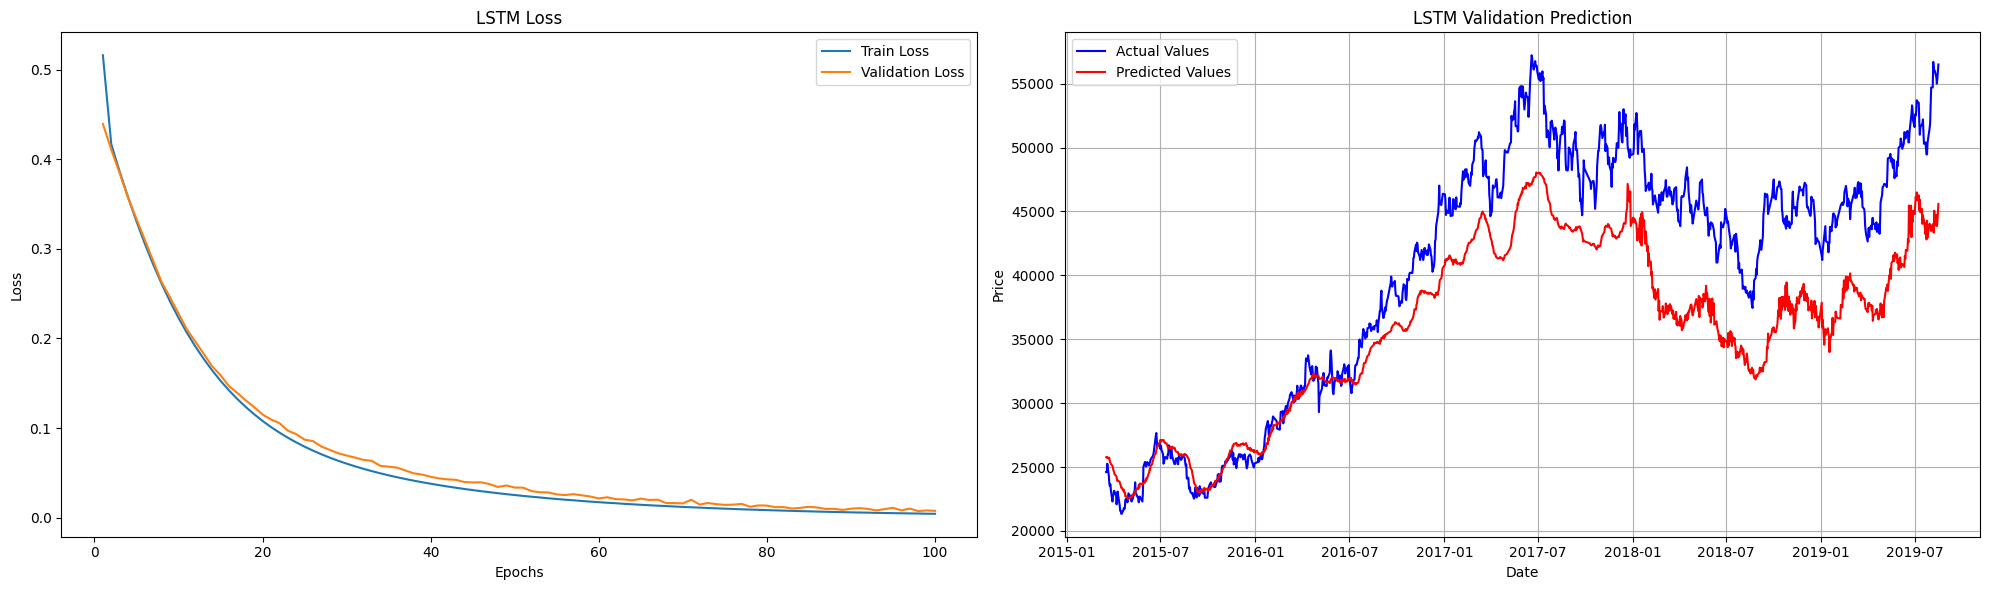

Before Inverse Scaling
MAE: 4778.8498
MSE: 33957800.8047
RMSE: 5827.3322
R²: 0.6549
--------------------
After Inverse Scaling
MAE: 0.0474
MSE: 0.0032
RMSE: 0.0565
R²: 0.7518
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


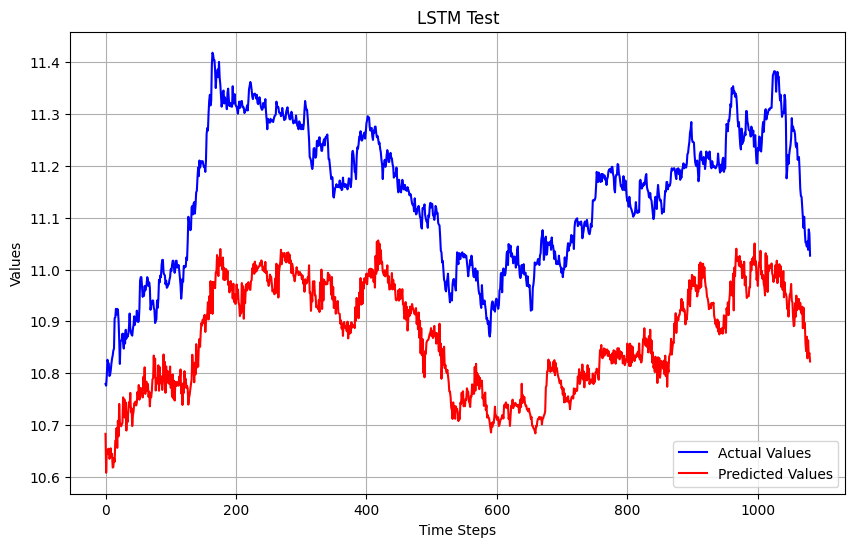

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper31.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper31.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 32

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper32", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper32.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=7, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(32, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper32 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper32.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper32.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper32.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper32.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.3843 - mse: 0.0795 - val_loss: 0.3318 - val_mse: 0.0403 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2898 - mse: 0.0031 - val_loss: 0.3002 - val_mse: 0.0278 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2694 - mse: 0.0016 - val_loss: 0.2786 - val_mse: 0.0246 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2508 - mse: 0.0013 - val_loss: 0.2597 - val_mse: 0.0234 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2330 - mse: 0.0010 - val_loss: 0.2415 - val_mse: 0.0220 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2164 - mse: 9.1509e-04 - val_loss: 0.2247 - val_mse: 0.0210 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2008 - mse: 8.1798e-04 - val_loss: 0.2083 - val_mse: 0.019

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 90, 17)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 84, 64)         │          7,680 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 42, 64)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 42, 64)         │         33,024 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 64)             │         33,024 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          4,160 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 42, 64)         │              0 │ lstm[0][0],            │
│                           │                        │                │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 42, 32)         │          2,080 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 42, 1)          │             33 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 240,005 (937.52 KB)

 Trainable params: 80,001 (312.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,004 (625.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


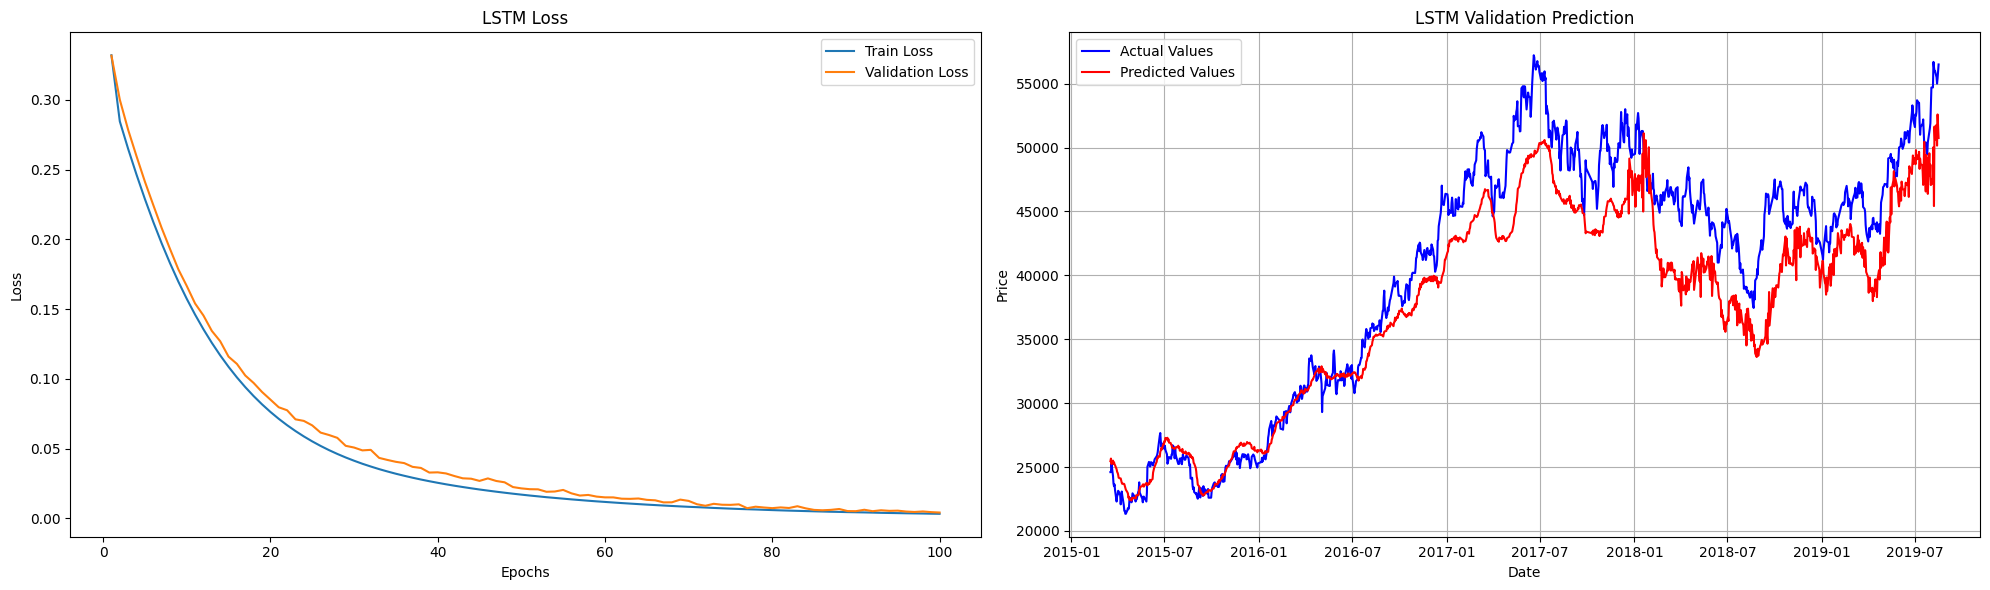

Before Inverse Scaling
MAE: 2985.9037
MSE: 14104969.8434
RMSE: 3755.6584
R²: 0.8566
--------------------
After Inverse Scaling
MAE: 0.0293
MSE: 0.0013
RMSE: 0.0358
R²: 0.9004
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


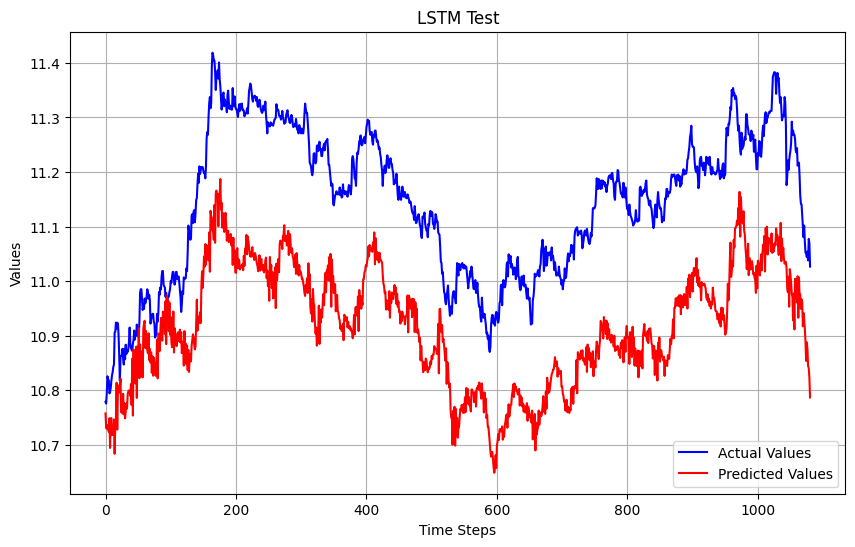

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper32.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper32.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 33

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper33", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper33.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=7, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(32, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper33 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper33.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper33.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper33.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper33.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4138 - mse: 0.1272 - val_loss: 0.3109 - val_mse: 0.0475 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2588 - mse: 0.0032 - val_loss: 0.2622 - val_mse: 0.0297 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2266 - mse: 0.0014 - val_loss: 0.2210 - val_mse: 0.0167 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1988 - mse: 9.6863e-04 - val_loss: 0.1926 - val_mse: 0.0133 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1743 - mse: 7.5471e-04 - val_loss: 0.1671 - val_mse: 0.0098 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1530 - mse: 6.8502e-04 - val_loss: 0.1463 - val_mse: 0.0082 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1345 - mse: 7.0035e-04 - val_loss: 0

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 84, 64)         │          7,680 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 42, 64)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 42, 64)         │         33,024 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 32)             │         12,416 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          2,112 │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 42, 64)         │              0 │ lstm_2[0][0],          │
│                           │                        │                │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 42, 32)         │          2,080 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 42, 1)          │             33 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 172,037 (672.02 KB)

 Trainable params: 57,345 (224.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 114,692 (448.02 KB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


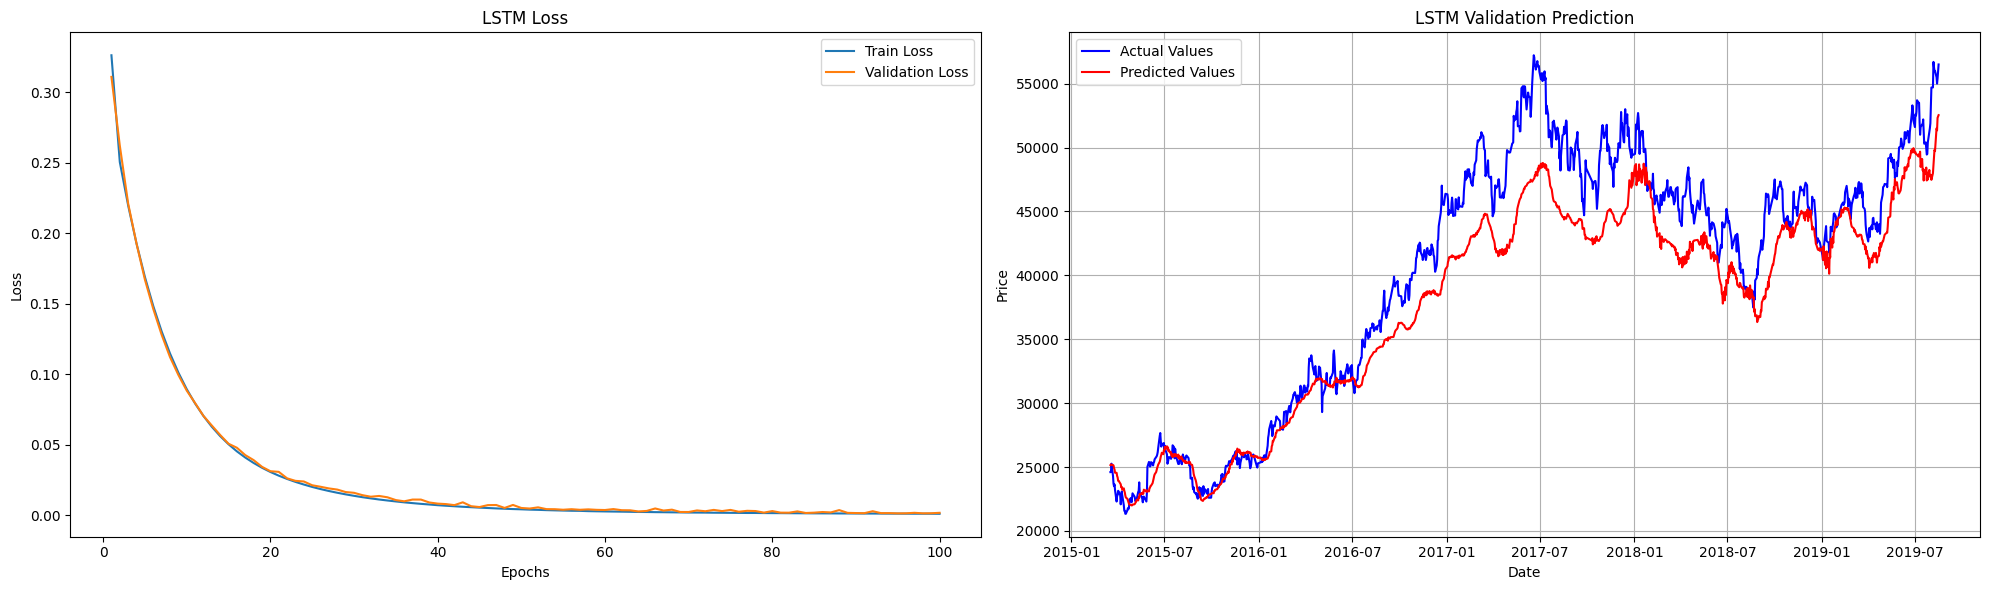

Before Inverse Scaling
MAE: 2759.5328
MSE: 12495248.1922
RMSE: 3534.8618
R²: 0.8730
--------------------
After Inverse Scaling
MAE: 0.0268
MSE: 0.0011
RMSE: 0.0326
R²: 0.9172
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


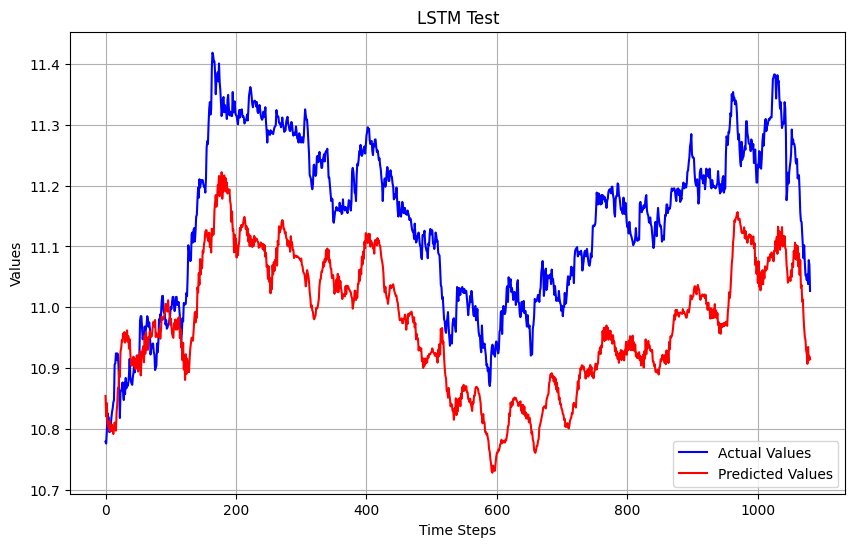

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper33.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper33.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 34

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper34", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper34.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=5, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.002))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper34 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper34.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper34.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper34.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper34.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6122 - mse: 0.0545 - val_loss: 0.5446 - val_mse: 0.0278 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.5050 - mse: 0.0019 - val_loss: 0.5003 - val_mse: 0.0374 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.4515 - mse: 0.0013 - val_loss: 0.4506 - val_mse: 0.0374 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.4027 - mse: 0.0010 - val_loss: 0.3996 - val_mse: 0.0315 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3585 - mse: 8.5784e-04 - val_loss: 0.3575 - val_mse: 0.0301 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3187 - mse: 7.3291e-04 - val_loss: 0.3182 - val_mse: 0.0274 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2830 - mse: 6.8625e-04 - val_loss: 0.2806 - val_mse: 0

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 86, 64)         │          5,504 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 43, 64)         │              0 │ conv1d_8[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_16 (LSTM)            │ (None, 43, 128)        │         98,816 │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_17 (LSTM)            │ (None, 64)             │         49,408 │ lstm_16[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 128)            │          8,320 │ lstm_17[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_16 (Add)              │ (None, 43, 128)        │              0 │ lstm_16[0][0],         │
│                           │                        │                │ dense_29[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 43, 64)         │          8,256 │ add_16[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 43, 1)          │             65 │ dense_30[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 511,109 (1.95 MB)

 Trainable params: 170,369 (665.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340,740 (1.30 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


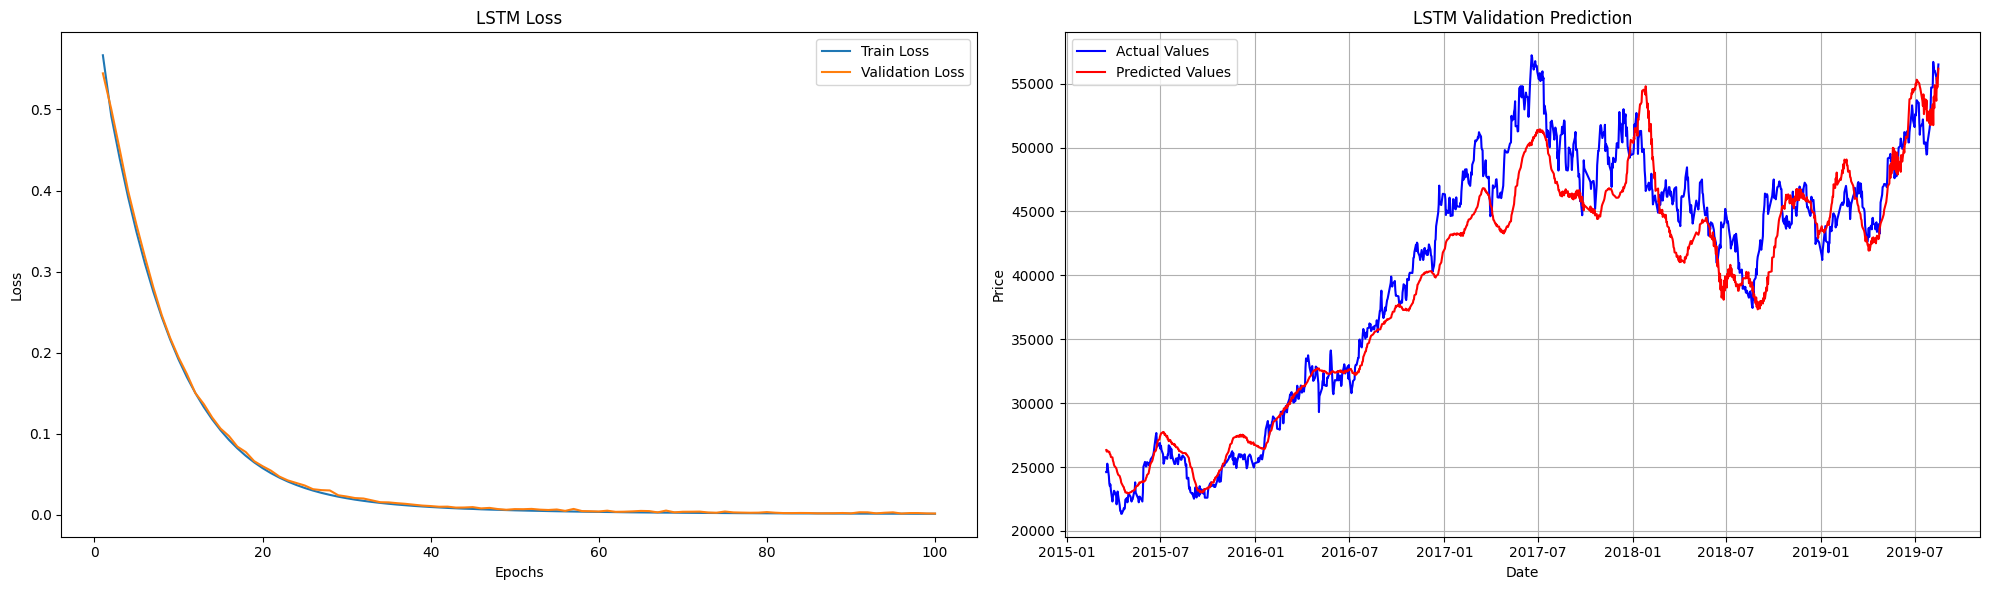

Before Inverse Scaling
MAE: 2067.9118
MSE: 7142725.6320
RMSE: 2672.5878
R²: 0.9274
--------------------
After Inverse Scaling
MAE: 0.0206
MSE: 0.0006
RMSE: 0.0254
R²: 0.9498
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


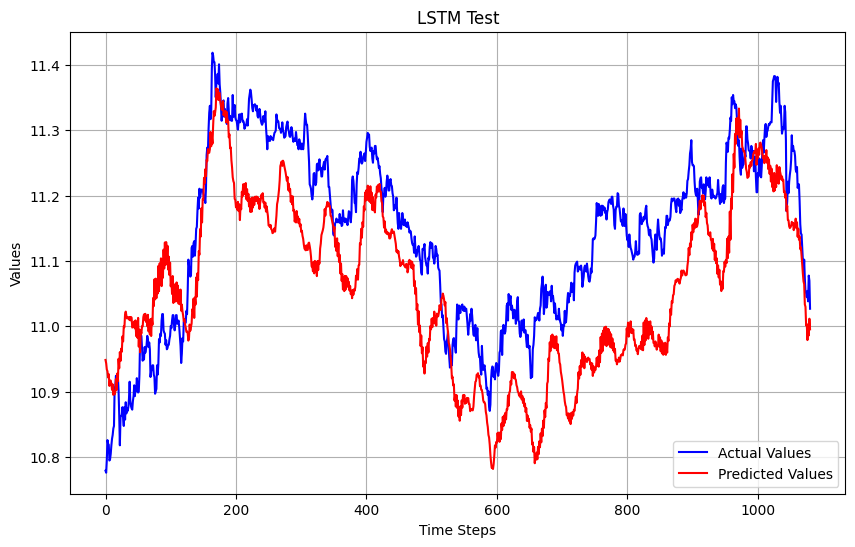

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper34.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper34.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 35

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper35", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper35.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=5, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0015), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper35 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper35.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper35.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper35.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper35.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5046 - mse: 0.1686 - val_loss: 0.3335 - val_mse: 0.0192 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3113 - mse: 0.0044 - val_loss: 0.2958 - val_mse: 0.0109 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2796 - mse: 0.0016 - val_loss: 0.2666 - val_mse: 0.0090 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2522 - mse: 0.0011 - val_loss: 0.2402 - val_mse: 0.0078 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2274 - mse: 8.5638e-04 - val_loss: 0.2176 - val_mse: 0.0081 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2050 - mse: 7.8507e-04 - val_loss: 0.1962 - val_mse: 0.0073 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1848 - mse: 7.0998e-04 - val_loss: 0.1760 - val_mse: 0

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 86, 64)         │          5,504 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_16          │ (None, 43, 64)         │              0 │ conv1d_16[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_32 (LSTM)            │ (None, 43, 128)        │         98,816 │ max_pooling1d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_33 (LSTM)            │ (None, 64)             │         49,408 │ lstm_32[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_61 (Dense)          │ (None, 128)            │          8,320 │ lstm_33[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_24 (Add)              │ (None, 43, 128)        │              0 │ lstm_32[0][0],         │
│                           │                        │                │ dense_61[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_62 (Dense)          │ (None, 43, 64)         │          8,256 │ add_24[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_64 (Dense)          │ (None, 43, 1)          │             65 │ dense_62[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 511,109 (1.95 MB)

 Trainable params: 170,369 (665.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340,740 (1.30 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


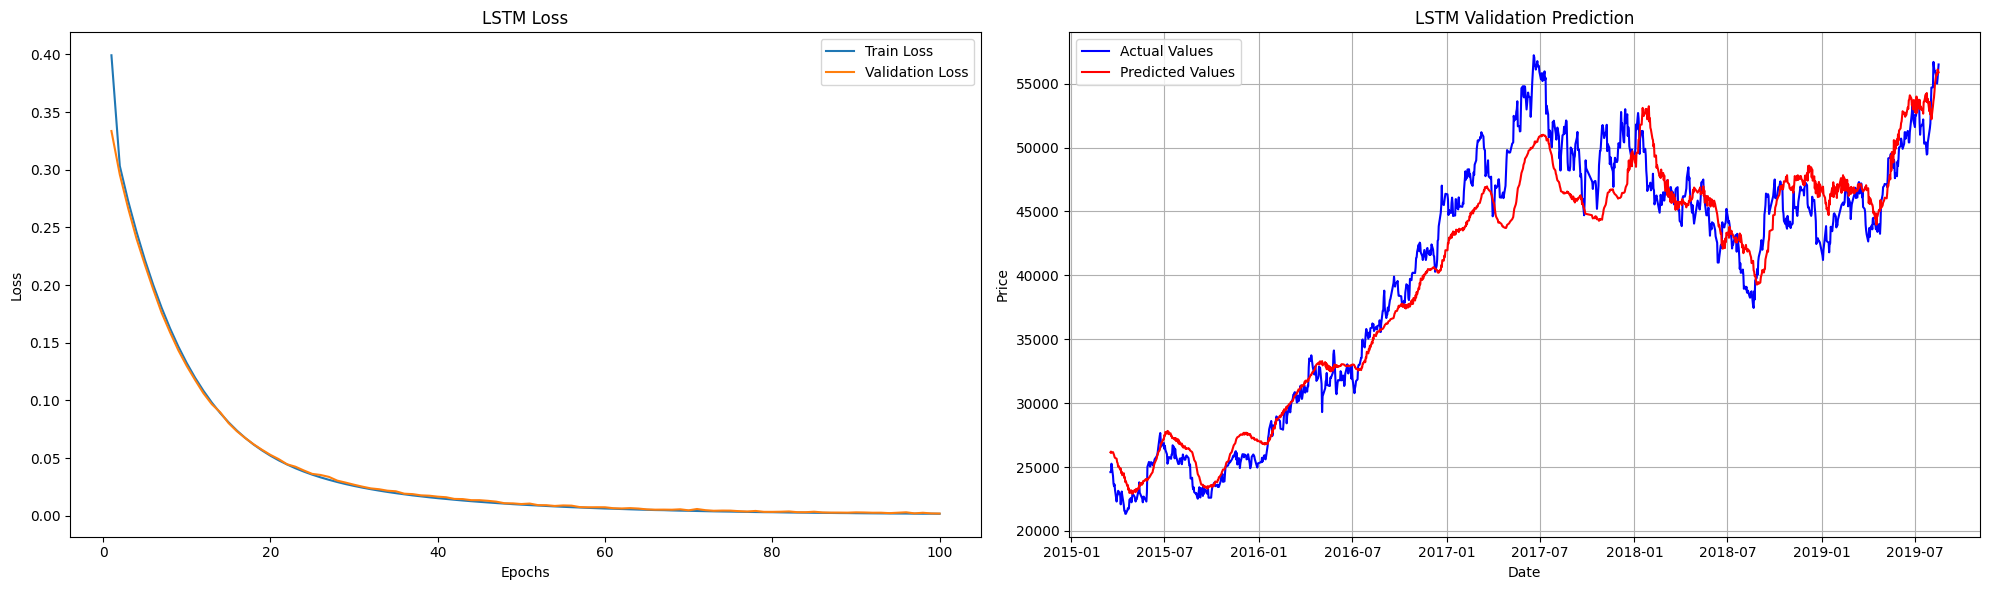

Before Inverse Scaling
MAE: 1942.3421
MSE: 6124149.5057
RMSE: 2474.7019
R²: 0.9378
--------------------
After Inverse Scaling
MAE: 0.0194
MSE: 0.0006
RMSE: 0.0237
R²: 0.9565
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


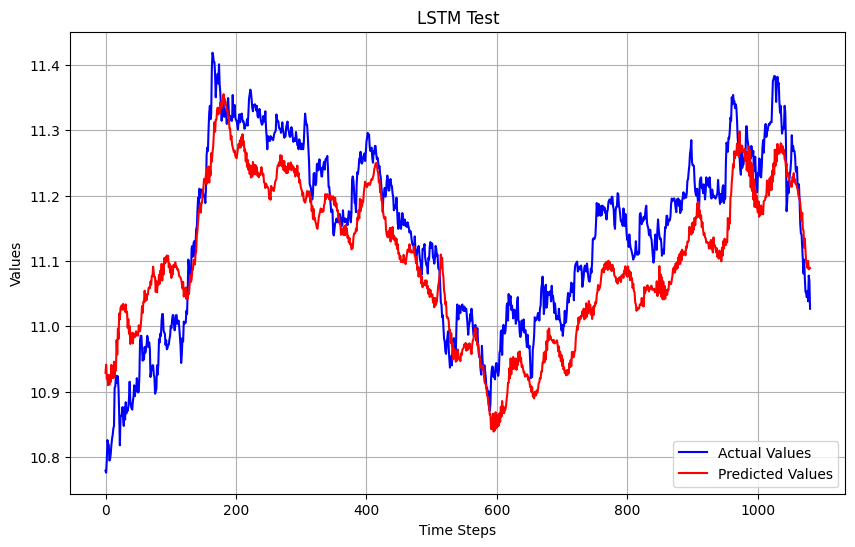

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper35.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper35.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 36

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper36", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper36.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=5, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper36 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper36.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper36.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper36.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper36.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.3624 - mse: 0.0882 - val_loss: 0.2475 - val_mse: 0.0072 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2306 - mse: 9.7666e-04 - val_loss: 0.2077 - val_mse: 0.0084 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1909 - mse: 5.7226e-04 - val_loss: 0.1742 - val_mse: 0.0093 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1579 - mse: 4.9298e-04 - val_loss: 0.1444 - val_mse: 0.0078 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1309 - mse: 4.5976e-04 - val_loss: 0.1213 - val_mse: 0.0079 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1089 - mse: 4.4027e-04 - val_loss: 0.1019 - val_mse: 0.0073 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0911 - mse: 4.3723e-04 - val

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20            │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_20 (Conv1D)        │ (None, 86, 64)         │          5,504 │ input_layer_20[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_20          │ (None, 43, 64)         │              0 │ conv1d_20[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_40 (LSTM)            │ (None, 43, 128)        │         98,816 │ max_pooling1d_20[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_41 (LSTM)            │ (None, 64)             │         49,408 │ lstm_40[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_77 (Dense)          │ (None, 128)            │          8,320 │ lstm_41[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_28 (Add)              │ (None, 43, 128)        │              0 │ lstm_40[0][0],         │
│                           │                        │                │ dense_77[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_78 (Dense)          │ (None, 43, 64)         │          8,256 │ add_28[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_80 (Dense)          │ (None, 43, 1)          │             65 │ dense_78[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 511,109 (1.95 MB)

 Trainable params: 170,369 (665.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340,740 (1.30 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


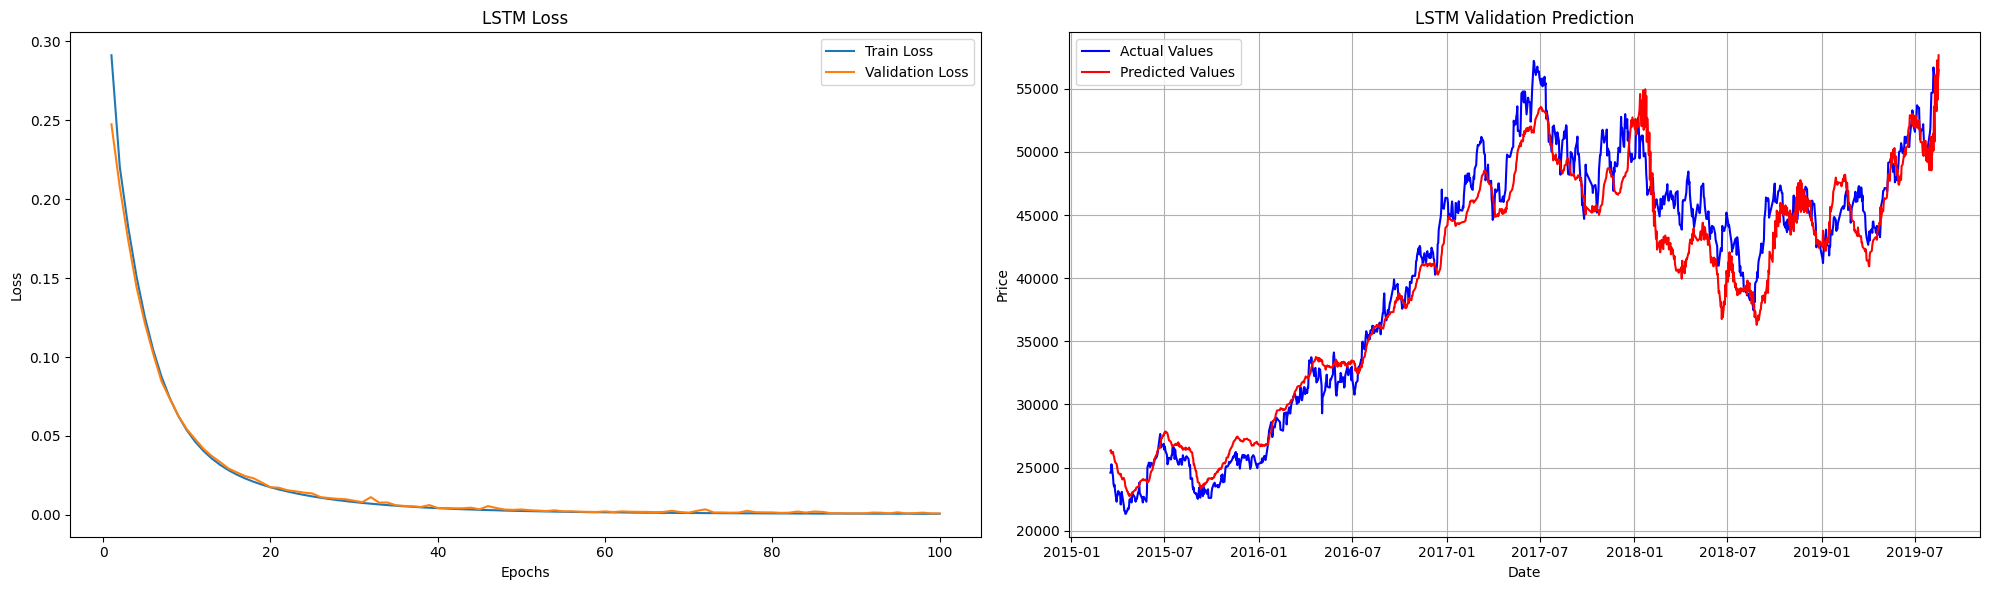

Before Inverse Scaling
MAE: 1722.4051
MSE: 4927236.2391
RMSE: 2219.7379
R²: 0.9499
--------------------
After Inverse Scaling
MAE: 0.0178
MSE: 0.0005
RMSE: 0.0221
R²: 0.9620
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


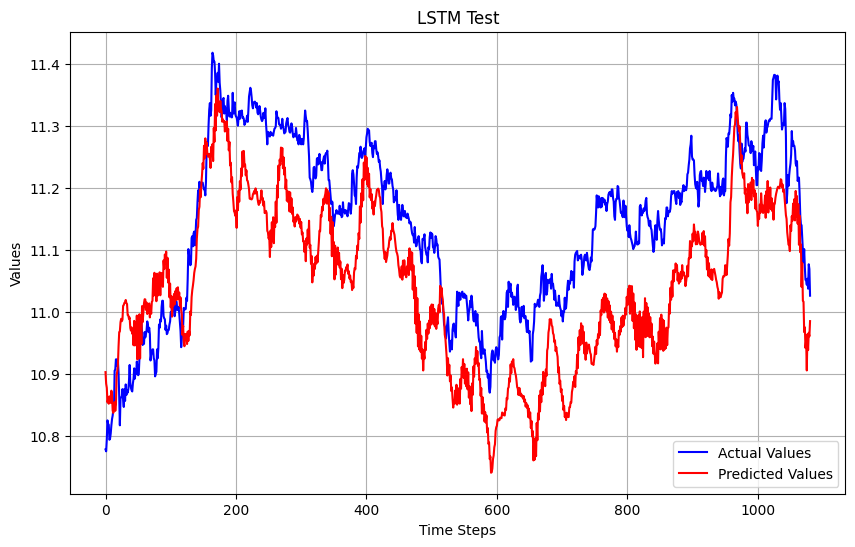

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper36.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper36.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 37

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper37", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper37.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=5, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper37 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper37.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper37.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper37.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper37.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.1685 - mse: 0.0604 - val_loss: 0.1045 - val_mse: 0.0129 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0880 - mse: 0.0015 - val_loss: 0.0900 - val_mse: 0.0173 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0696 - mse: 8.5852e-04 - val_loss: 0.0738 - val_mse: 0.0161 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0552 - mse: 6.2496e-04 - val_loss: 0.0600 - val_mse: 0.0141 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0440 - mse: 5.1626e-04 - val_loss: 0.0490 - val_mse: 0.0122 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0354 - mse: 5.1937e-04 - val_loss: 0.0385 - val_mse: 0.0088 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0287 - mse: 4.7080e-04 - val_los

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21            │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_21 (Conv1D)        │ (None, 86, 64)         │          5,504 │ input_layer_21[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_21          │ (None, 43, 64)         │              0 │ conv1d_21[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_42 (LSTM)            │ (None, 43, 128)        │         98,816 │ max_pooling1d_21[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_43 (LSTM)            │ (None, 64)             │         49,408 │ lstm_42[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_81 (Dense)          │ (None, 128)            │          8,320 │ lstm_43[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_29 (Add)              │ (None, 43, 128)        │              0 │ lstm_42[0][0],         │
│                           │                        │                │ dense_81[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_82 (Dense)          │ (None, 43, 64)         │          8,256 │ add_29[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_84 (Dense)          │ (None, 43, 1)          │             65 │ dense_82[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 511,109 (1.95 MB)

 Trainable params: 170,369 (665.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340,740 (1.30 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


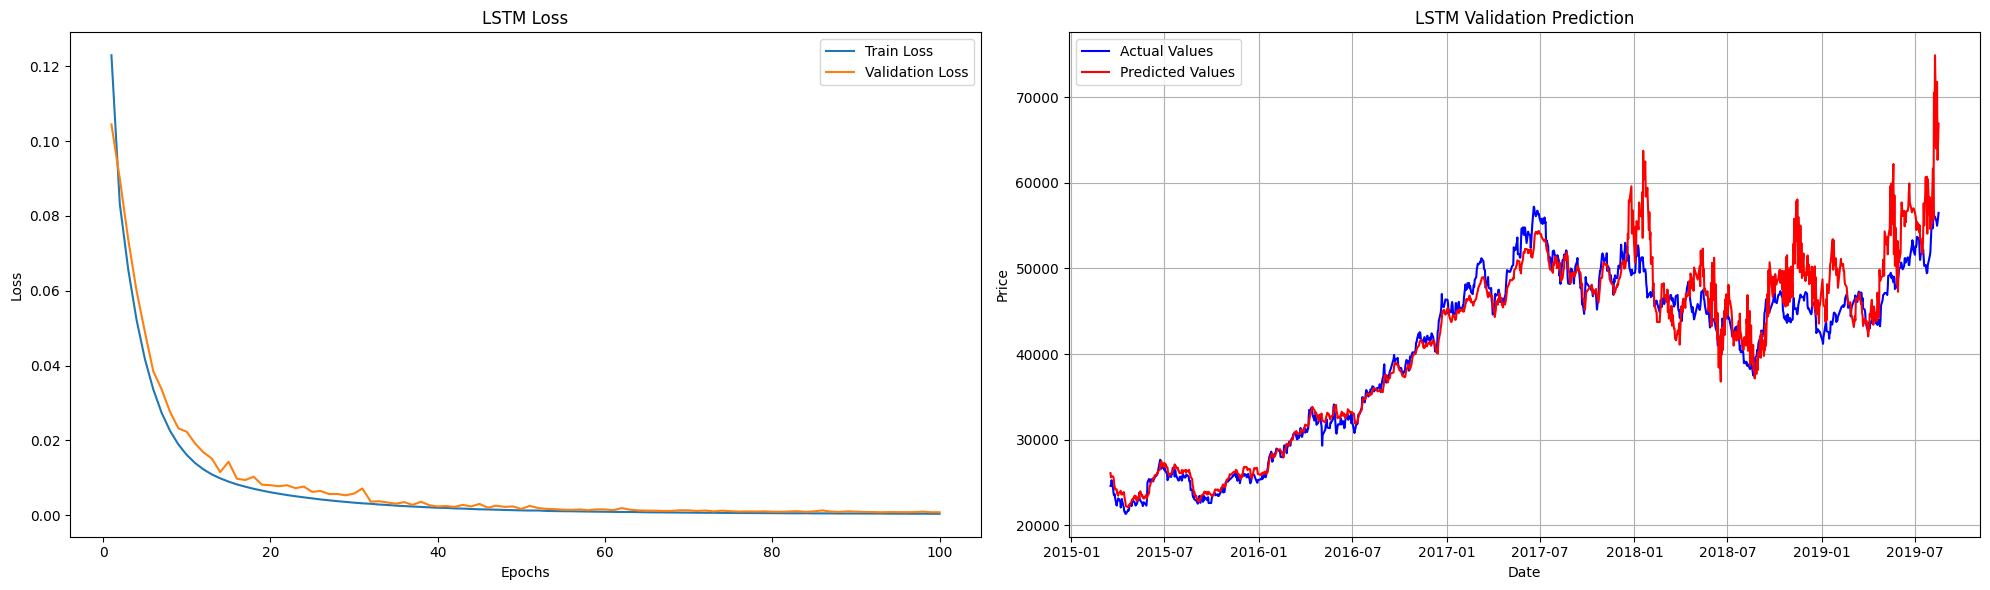

Before Inverse Scaling
MAE: 1879.1813
MSE: 9099709.7493
RMSE: 3016.5725
R²: 0.9075
--------------------
After Inverse Scaling
MAE: 0.0172
MSE: 0.0006
RMSE: 0.0251
R²: 0.9509
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


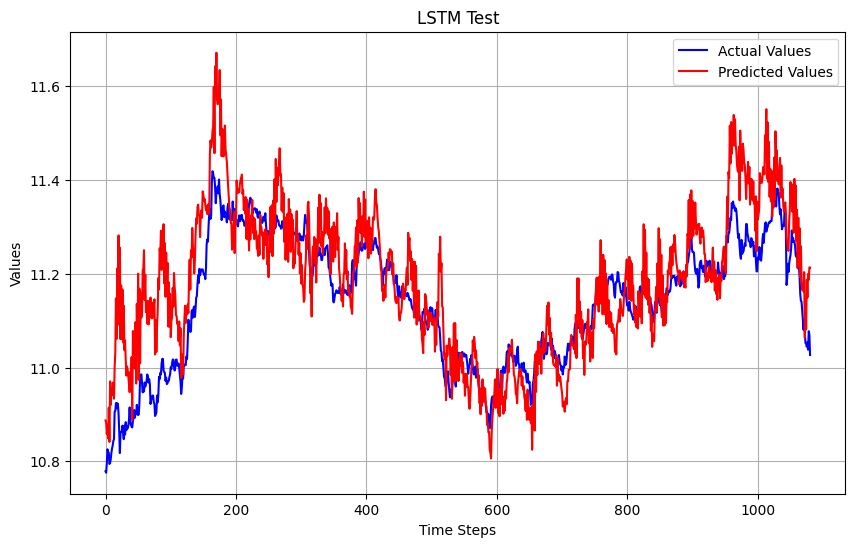

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper37.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper37.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 38

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper38", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper38.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=5, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.003), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper38 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper38.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper38.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper38.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper38.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.4338 - mse: 0.1065 - val_loss: 0.2818 - val_mse: 0.0070 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2607 - mse: 0.0017 - val_loss: 0.2269 - val_mse: 0.0119 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2035 - mse: 0.0011 - val_loss: 0.1834 - val_mse: 0.0158 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1586 - mse: 8.3275e-04 - val_loss: 0.1471 - val_mse: 0.0165 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1236 - mse: 6.7935e-04 - val_loss: 0.1165 - val_mse: 0.0145 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0967 - mse: 6.2659e-04 - val_loss: 0.0978 - val_mse: 0.0178 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0761 - mse: 5.8920e-04 - val_loss: 0

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24            │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_24 (Conv1D)        │ (None, 86, 64)         │          5,504 │ input_layer_24[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_24          │ (None, 43, 64)         │              0 │ conv1d_24[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_48 (LSTM)            │ (None, 43, 128)        │         98,816 │ max_pooling1d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_49 (LSTM)            │ (None, 64)             │         49,408 │ lstm_48[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_93 (Dense)          │ (None, 128)            │          8,320 │ lstm_49[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_32 (Add)              │ (None, 43, 128)        │              0 │ lstm_48[0][0],         │
│                           │                        │                │ dense_93[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_94 (Dense)          │ (None, 43, 64)         │          8,256 │ add_32[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_96 (Dense)          │ (None, 43, 1)          │             65 │ dense_94[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 511,109 (1.95 MB)

 Trainable params: 170,369 (665.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340,740 (1.30 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


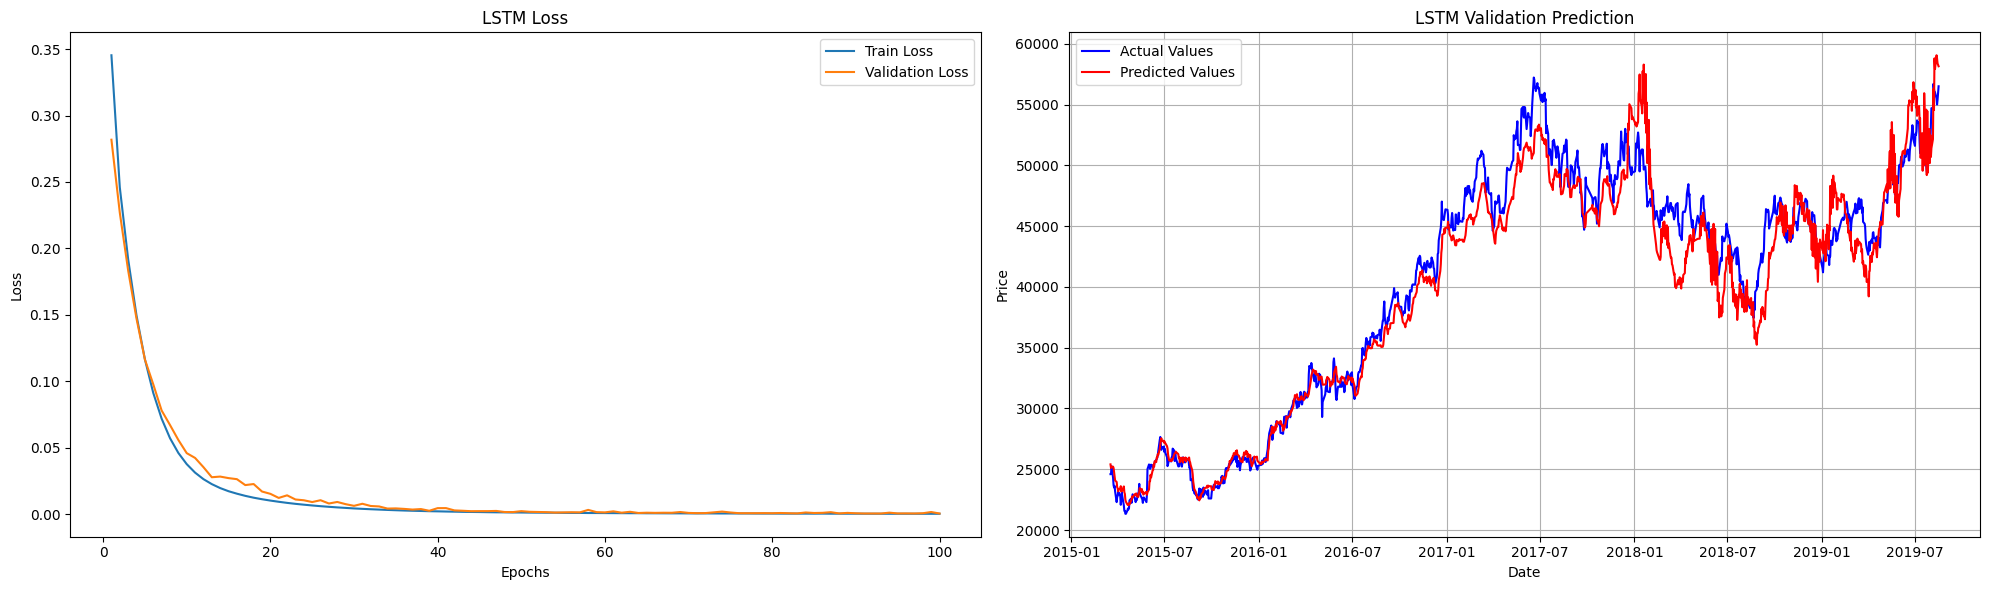

Before Inverse Scaling
MAE: 1675.4395
MSE: 5046222.5081
RMSE: 2246.3799
R²: 0.9487
--------------------
After Inverse Scaling
MAE: 0.0161
MSE: 0.0004
RMSE: 0.0207
R²: 0.9666
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


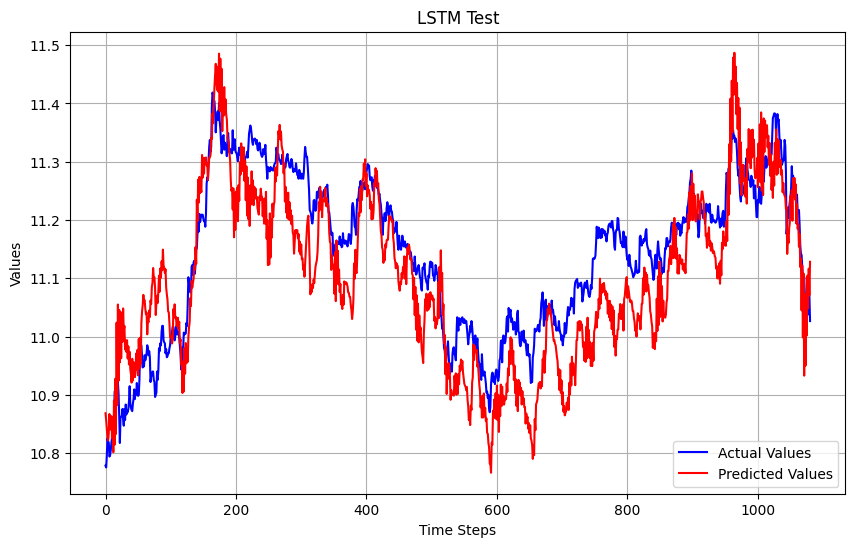

Before Inverse Scaling
MAE: 0.0718
MSE: 0.0072
RMSE: 0.0849
R²: 0.6133
--------------------
After Inverse Scaling
MAE: 0.0296
MSE: 0.0012
RMSE: 0.0351
R²: 0.6133


In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper38.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper38.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_test, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_test , y_pred )
rmse = np.sqrt(mean_squared_error(y_test , y_pred ))
mae = mean_absolute_error(y_test , y_pred )
r2 = r2_score(y_test , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

##### 39

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Int", name="hyper39", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper39.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=5, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0015), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper39 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper39.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper39.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper39.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper39.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.2741 - mse: 0.0930 - val_loss: 0.1759 - val_mse: 0.0194 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1502 - mse: 0.0013 - val_loss: 0.1385 - val_mse: 0.0109 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1222 - mse: 7.9843e-04 - val_loss: 0.1109 - val_mse: 0.0068 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0998 - mse: 6.5208e-04 - val_loss: 0.0897 - val_mse: 0.0044 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0819 - mse: 6.1483e-04 - val_loss: 0.0775 - val_mse: 0.0071 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0678 - mse: 5.5433e-04 - val_loss: 0.0644 - val_mse: 0.0057 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0568 - mse: 5.6836e-04 - val_lo

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28            │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_28 (Conv1D)        │ (None, 86, 64)         │          5,504 │ input_layer_28[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_28          │ (None, 43, 64)         │              0 │ conv1d_28[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_56 (LSTM)            │ (None, 43, 128)        │         98,816 │ max_pooling1d_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_57 (LSTM)            │ (None, 64)             │         49,408 │ lstm_56[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_109 (Dense)         │ (None, 128)            │          8,320 │ lstm_57[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_36 (Add)              │ (None, 43, 128)        │              0 │ lstm_56[0][0],         │
│                           │                        │                │ dense_109[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_110 (Dense)         │ (None, 43, 64)         │          8,256 │ add_36[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_112 (Dense)         │ (None, 43, 1)          │             65 │ dense_110[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 511,109 (1.95 MB)

 Trainable params: 170,369 (665.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340,740 (1.30 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


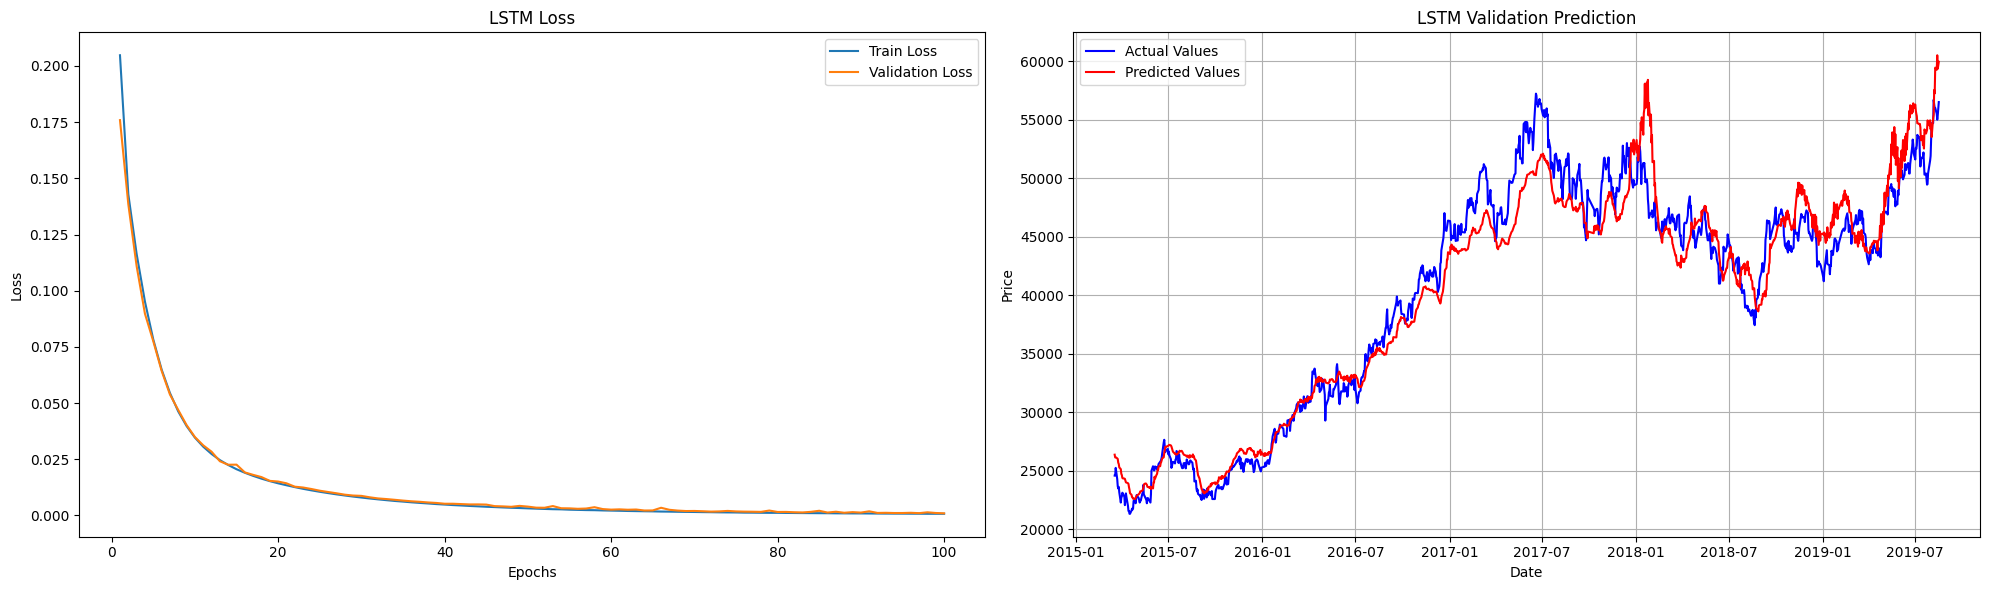

Before Inverse Scaling
MAE: 1814.4576
MSE: 5408326.0041
RMSE: 2325.5808
R²: 0.9450
--------------------
After Inverse Scaling
MAE: 0.0177
MSE: 0.0005
RMSE: 0.0214
R²: 0.9644
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


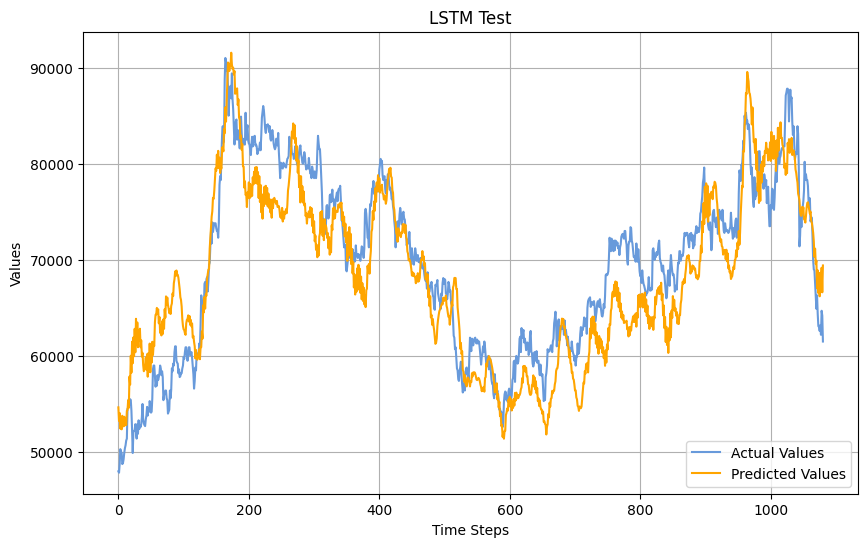

Before Inverse Scaling
MAE: 3765.3892
MSE: 20468499.6350
RMSE: 4524.2126
R²: 0.7633
--------------------
After Inverse Scaling
MAE: 0.0230
MSE: 0.0008
RMSE: 0.0280
R²: 0.7528


In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps) # 여기 val same, int 바꾸기

y_pred = model_int_hyper39.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_int_df.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_int_hyper39.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_test, y_pred
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred) # scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_test = y_scaler_selected_int_df.inverse_transform(y_test) # scaler 바꾸기
y_test = np.round(np.exp(y_test), 4)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = '#689ADB')
plt.plot(y_pred, label='Predicted Values', color = 'orange')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_test , y_pred )
rmse = np.sqrt(mean_squared_error(y_test , y_pred ))
mae = mean_absolute_error(y_test , y_pred )
r2 = r2_score(y_test , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

In [ ]:
ddf = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/int_final.csv')
ddf['Date'] = pd.to_datetime(ddf['Date'])
dates = ddf['Date']
dates.info()
test_dates = ddf['Date'][4781:] ###4692 ###4782
###테스트 시작 날짜: dates.iloc[4692:]

<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
5865 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 45.9 KB


In [ ]:
import datetime

def simple_feature_generator(current_input, prediction):
    """
    피처 값을 단순히 이전 값으로 유지하는 예제 함수
    """
    last_features = current_input[0, -1, :-1]  # 마지막 피처 값 가져오기
    return last_features

def predict_future_dynamic(model, x_test, scaler, steps=90, feature_generator=None):
    future_predictions = []
    upper_bounds = []
    lower_bounds = []

    current_input = x_test[-1:]

    for i in range(steps):
        # 예측 수행
        prediction = model.predict(current_input)[0, 0]
        prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
        prediction_inverse = np.exp(prediction_inverse)
        print(f"Day {i+1} Prediction: {prediction_inverse}")

        # 동적으로 불확실성 계산 (처음에는 좁고 끝으로 갈수록 퍼지는 영역)
        uncertainty = 0.02 + 0.01 * i / steps  # 불확실성 비율 증가 (처음에는 2%, 끝에는 약 12%까지)

        upper_bound = prediction * (1 + uncertainty)
        lower_bound = prediction * (1 - uncertainty)

        future_predictions.append(prediction)
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)

        if feature_generator:
            next_features = feature_generator(current_input, prediction)
        else:
            next_features = current_input[0, 1:, :-1]

        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1, :-1] = next_features
        current_input[0, -1, -1] = prediction.item()

    return np.array(future_predictions), np.array(upper_bounds), np.array(lower_bounds)

def predict_future_confidence(model, x_test, steps=90, feature_generator=None):
    future_predictions = []
    current_input = x_test[-1:]

    for i in range(steps):
        prediction = model.predict(current_input)[0, 0]
        future_predictions.append(prediction)

        # Confidence Interval 계산 (표준편차 기반)
        if i == 0:
            std = np.std(x_test[:, :, -1])  # 과거 데이터 기반 변동성 계산
        upper_bound = np.array(future_predictions) + 1.96 * std  # 95% Confidence Interval 상한선
        lower_bound = np.array(future_predictions) - 1.96 * std  # 95% Confidence Interval 하한선

        if feature_generator:
            next_features = feature_generator(current_input, prediction)
        else:
            next_features = current_input[0, 1:, :-1]

        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1, :-1] = next_features
        current_input[0, -1, -1] = prediction

    return np.array(future_predictions), upper_bound, lower_bound

korea_holidays = pd.to_datetime([
    '2024-09-16', '2024-09-17', '2024-09-18',
    '2024-10-01', '2024-10-03', '2024-10-09',
])

def get_trading_days(start_date, periods, holidays):
    """
    시작 날짜부터 주말 및 공휴일을 제외한 거래일 계산
    """
    trading_days = []
    current_date = start_date
    while len(trading_days) < periods:
        if current_date.weekday() < 5 and current_date not in holidays:  # 주말 및 공휴일 제외
            trading_days.append(current_date)
        current_date += datetime.timedelta(days=1)
    return pd.to_datetime(trading_days)


future_dates = get_trading_days(test_dates.iloc[-1] + pd.Timedelta(days=1), periods=51, holidays=korea_holidays)
feature_generator = simple_feature_generator

In [ ]:
real_4th = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/samsung_stock_now.csv')
real_4th.head()

real_4th = real_4th.iloc[2:]
real_4th['Price'] = pd.to_datetime(real_4th['Price'])
real_4th = real_4th.set_index('Price')
real_4th.head()

real_close = real_4th['Close'].astype(float)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Day 1 Prediction: [[66140.14]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Day 2 Prediction: [[64665.586]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Day 3 Prediction: [[67204.71]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Day 4 Prediction: [[64750.004]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Day 5 Prediction: [[65664.63]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Day 6 Prediction: [[62466.523]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Day 7 Prediction: [[64266.03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Day 8 Prediction: [[59775.438]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Day 9 Prediction: [[61053.48]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Day 10 Prediction: [[57717.684]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Day 11 Prediction: [[58753.99]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Day 12 Prediction: [[55471.836]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Day 13 Prediction: [[55832.848]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Day 14 Prediction: [[53482.344]]
1/1 ━━━━━━━━━━━━━━━━━

<ipython-input-140-c7bf8fcd8d65>:3: RuntimeWarning: overflow encountered in exp
  y_test_rever = np.exp(y_test_rever)


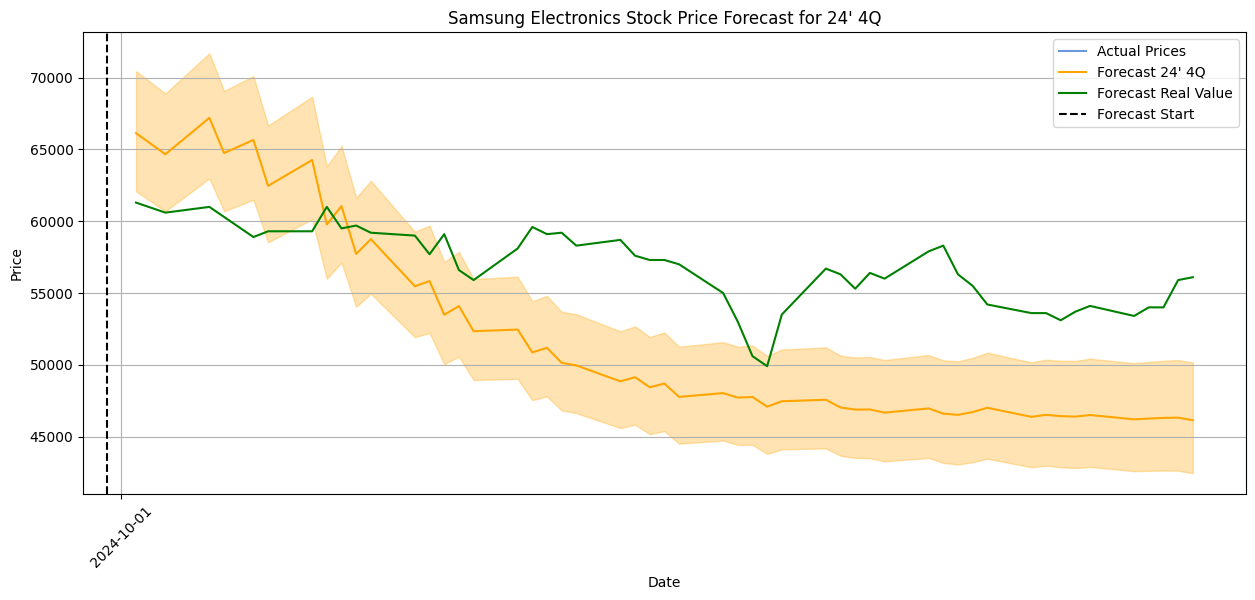

In [ ]:
future_90_days, upper_90_days, lower_90_days = predict_future_dynamic(model_int_hyper39, X_test, y_scaler_selected_int_df, steps=51, feature_generator=feature_generator)
y_test_rever = y_scaler_selected_int_df.inverse_transform(y_test[:len(test_dates)])
y_test_rever = np.exp(y_test_rever)

future_90_days_rever = y_scaler_selected_int_df.inverse_transform(future_90_days.reshape(-1, 1))
future_90_days_rever = np.exp(future_90_days_rever)

upper_90_days_rever = y_scaler_selected_int_df.inverse_transform(upper_90_days.reshape(-1, 1))
upper_90_days_rever = np.exp(upper_90_days_rever)

lower_90_days_rever = y_scaler_selected_int_df.inverse_transform(lower_90_days.reshape(-1, 1))
lower_90_days_rever = np.exp(lower_90_days_rever)

plt.figure(figsize=(15, 6))
plt.plot(test_dates[:len(y_test_rever)], y_test_rever, label='Actual Prices', color='#689ADB')
plt.plot(future_dates[:len(future_90_days_rever)], future_90_days_rever[:len(future_dates)], label='Forecast 24\' 4Q', color='orange')
plt.plot(real_close.index, real_close.values, label='Forecast Real Value', color='green')
plt.fill_between(
    future_dates[:len(future_90_days_rever)],
    upper_90_days_rever.ravel(),
    lower_90_days_rever.ravel(),
    color='orange', alpha=0.3
)
forecast_start_date = test_dates.iloc[-1]
plt.axvline(x=forecast_start_date, color='black', linestyle='--', label='Forecast Start')

plt.title('Samsung Electronics Stock Price Forecast for 24\' 4Q')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()

모델 불러오기

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM Fin - Int", name="hyper39", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

In [ ]:
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(64, kernel_size=5, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0015), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0001))(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper39_load = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper39_load.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

In [ ]:
model_int_hyper39_load.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/int_hyper39.weights.h5')
model_int_hyper39_load.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 86, 64)         │          5,504 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 43, 64)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 43, 128)        │         98,816 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ (None, 64)             │         49,408 │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 128)            │          8,320 │ lstm_5[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 43, 128)        │              0 │ lstm_4[0][0],          │
│                           │                        │                │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 43, 64)         │          8,256 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 43, 1)          │             65 │ dense_11[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 170,369 (665.50 KB)

 Trainable params: 170,369 (665.50 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
Day 1 Prediction: [[52344.863]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Day 2 Prediction: [[52123.242]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Day 3 Prediction: [[52404.305]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Day 4 Prediction: [[51976.11]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Day 5 Prediction: [[52035.188]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Day 6 Prediction: [[51546.56]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Day 7 Prediction: [[51638.863]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Day 8 Prediction: [[51100.805]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Day 9 Prediction: [[51064.316]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Day 10 Prediction: [[50488.227]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Day 11 Prediction: [[50462.76]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Day 12 Prediction: [[49908.203]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Day 13 Prediction: [[49856.164]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Day 14 Prediction: [[49466.195]]
1/1 ━━━━━━━━━━━━━

<ipython-input-65-137afca98974>:3: RuntimeWarning: overflow encountered in exp
  y_test_rever = np.exp(y_test_rever)


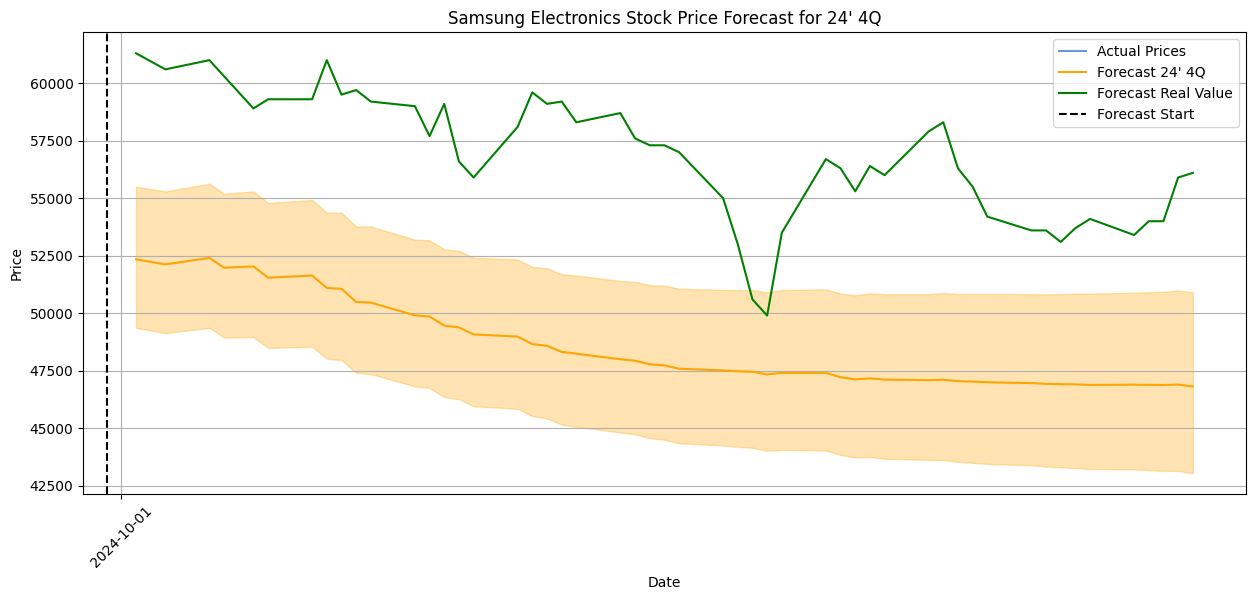

In [ ]:
future_90_days, upper_90_days, lower_90_days = predict_future_dynamic(model_int_hyper39_load, X_test, y_scaler_selected_int_df, steps=51, feature_generator=feature_generator)
y_test_rever = y_scaler_selected_int_df.inverse_transform(y_test[:len(test_dates)])
y_test_rever = np.exp(y_test_rever)

future_90_days_rever = y_scaler_selected_int_df.inverse_transform(future_90_days.reshape(-1, 1))
future_90_days_rever = np.exp(future_90_days_rever)

upper_90_days_rever = y_scaler_selected_int_df.inverse_transform(upper_90_days.reshape(-1, 1))
upper_90_days_rever = np.exp(upper_90_days_rever)

lower_90_days_rever = y_scaler_selected_int_df.inverse_transform(lower_90_days.reshape(-1, 1))
lower_90_days_rever = np.exp(lower_90_days_rever)

plt.figure(figsize=(15, 6))
plt.plot(test_dates[:len(y_test_rever)], y_test_rever, label='Actual Prices', color='#689ADB')
plt.plot(future_dates[:len(future_90_days_rever)], future_90_days_rever[:len(future_dates)], label='Forecast 24\' 4Q', color='orange')
plt.plot(real_close.index, real_close.values, label='Forecast Real Value', color='green')
plt.fill_between(
    future_dates[:len(future_90_days_rever)],
    upper_90_days_rever.ravel(),
    lower_90_days_rever.ravel(),
    color='orange', alpha=0.3
)
forecast_start_date = test_dates.iloc[-1]
plt.axvline(x=forecast_start_date, color='black', linestyle='--', label='Forecast Start')

plt.title('Samsung Electronics Stock Price Forecast for 24\' 4Q')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 액면분할 처리

In [ ]:
ss = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/Preprocessing_Code/사본/one_hot_int.csv')

In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5862 non-null   object 
 1   Open                       5862 non-null   float64
 2   High                       5862 non-null   float64
 3   Low                        5862 non-null   float64
 4   Close                      5862 non-null   float64
 5   Volume                     5862 non-null   float64
 6   Change                     5862 non-null   float64
 7   Transaction                5862 non-null   float64
 8   SE_Operating_Profit        5862 non-null   float64
 9   SE_Net_Profit              5862 non-null   float64
 10  SE_Total_Equity            5862 non-null   float64
 11  SE_Total_Liabilities       5862 non-null   float64
 12  SE_Revenue                 5862 non-null   float64
 13  SE_Foreign                 5862 non-null   float

In [ ]:
ss.head()

Date      Open      High       Low     Close     Volume    Change  \
0  2001-01-02  8.058327  8.125631  8.051978  8.116716  17.490706  0.304463   
1  2001-01-03  8.079928  8.137396  8.077137  8.122668  17.449330  0.304463   
2  2001-01-04  8.240121  8.261010  8.205218  8.237479  17.959753  1.027374   
3  2001-01-05  8.232174  8.273847  8.216088  8.268732  17.959753  1.750286   
4  2001-01-08  8.248006  8.271293  8.237479  8.263590  17.560192 -0.318066   

   Transaction  SE_Operating_Profit  SE_Net_Profit  ...  High_Low_Volatility  \
0    25.607421            29.836003       29.42326  ...            -3.095450   
1    25.571998            29.837042       29.42326  ...            -3.095450   
2    26.839751            29.838044       29.42326  ...            -3.095450   
3    26.442709            29.839010       29.42326  ...            -3.095450   
4    25.823783            29.841696       29.42326  ...            -3.396056   

      Lag_1    Lag_30    Lag_60    Lag_90  US_President_Republican  \
0  8.116716  8.116716  8.116716  8.116716                     True   
1  8.116716  8.116716  8.116716  8.116716                     True   
2  8.122668  8.122668  8.122668  8.122668                     True   
3  8.237479  8.237479  8.237479  8.237479                     True   
4  8.268732  8.268732  8.268732  8.268732                     True   

   US_President_Democratic  KR_President_Democratic  \
0                    False                     True   
1                    False                     True   
2                    False                     True   
3                    False                     True   
4                    False                     True   

   KR_President_Conservative  KR_President_Neutral  
0                      False                 False  
1                      False                 False  
2                      False                 False  
3                      False                 False  
4                      False                 False  

[5 rows x 47 columns]

In [ ]:
ss['Date'] = pd.to_datetime(ss['Date'])
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       5862 non-null   datetime64[ns]
 1   Open                       5862 non-null   float64       
 2   High                       5862 non-null   float64       
 3   Low                        5862 non-null   float64       
 4   Close                      5862 non-null   float64       
 5   Volume                     5862 non-null   float64       
 6   Change                     5862 non-null   float64       
 7   Transaction                5862 non-null   float64       
 8   SE_Operating_Profit        5862 non-null   float64       
 9   SE_Net_Profit              5862 non-null   float64       
 10  SE_Total_Equity            5862 non-null   float64       
 11  SE_Total_Liabilities       5862 non-null   float64       
 12  SE_Rev

In [ ]:
ss.set_index('Date', inplace = True)

In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

ss_features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'US_10', 'KR_Unemployment',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_60', 'Lag_90']

In [ ]:
selected_x_train_ss = ss[ss_features][:3518].values
selected_y_train_ss = ss[target][:3518].values

selected_x_val_ss = ss[ss_features][3518:4691].values
selected_y_val_ss = ss[target][3518:4691].values

selected_x_test_ss = ss[ss_features][4691:].values
selected_y_test_ss = ss[target][4691:].values

x_scaler_selected_ss, y_scaler_selected_ss = MinMaxScaler(), MinMaxScaler()

selected_x_train_ss = x_scaler_selected_ss.fit_transform(selected_x_train_ss)
selected_y_train_ss = y_scaler_selected_ss.fit_transform(selected_y_train_ss.reshape(-1, 1))

selected_x_val_ss = x_scaler_selected_ss.transform(selected_x_val_ss)
selected_y_val_ss = y_scaler_selected_ss.transform(selected_y_val_ss.reshape(-1, 1))

selected_x_test_ss = x_scaler_selected_ss.transform(selected_x_test_ss)
selected_y_test_ss = y_scaler_selected_ss.transform(selected_y_test_ss.reshape(-1, 1))

##### 1

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Stock Split", name="hyper1", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/ss_hyper1.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_ss, selected_y_train_ss, time_steps)
X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps)


input_layer = Input(shape=(time_steps, len(ss_features)))

conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True)(pool1)

#skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(lstm1)

# skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
# skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
# skip2 = Add()([skip1_reshaped, lstm2])

lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_ss_hyper1 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_ss_hyper1.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_ss_hyper1.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_ss_hyper1.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_ss_hyper1.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.1693 - mse: 0.0599 - val_loss: 0.1032 - val_mse: 0.0081 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0920 - mse: 0.0013 - val_loss: 0.0841 - val_mse: 0.0059 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0756 - mse: 9.9165e-04 - val_loss: 0.0683 - val_mse: 0.0039 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0621 - mse: 7.1002e-04 - val_loss: 0.0596 - val_mse: 0.0064 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0514 - mse: 5.6062e-04 - val_loss: 0.0508 - val_mse: 0.0066 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0428 - mse: 5.1433e-04 - val_loss: 0.0414 - val_mse: 0.0043 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0360 - mse: 4.4125e-04 - val_los

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_33            │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_33 (Conv1D)        │ (None, 88, 64)         │          3,328 │ input_layer_33[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_33          │ (None, 44, 64)         │              0 │ conv1d_33[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_66 (LSTM)            │ (None, 44, 128)        │         98,816 │ max_pooling1d_33[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_67 (LSTM)            │ (None, 64)             │         49,408 │ lstm_66[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_129 (Dense)         │ (None, 128)            │          8,320 │ lstm_67[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_41 (Add)              │ (None, 44, 128)        │              0 │ lstm_66[0][0],         │
│                           │                        │                │ dense_129[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_130 (Dense)         │ (None, 44, 64)         │          8,256 │ add_41[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_132 (Dense)         │ (None, 44, 1)          │             65 │ dense_130[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 504,581 (1.92 MB)

 Trainable params: 168,193 (657.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,388 (1.28 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


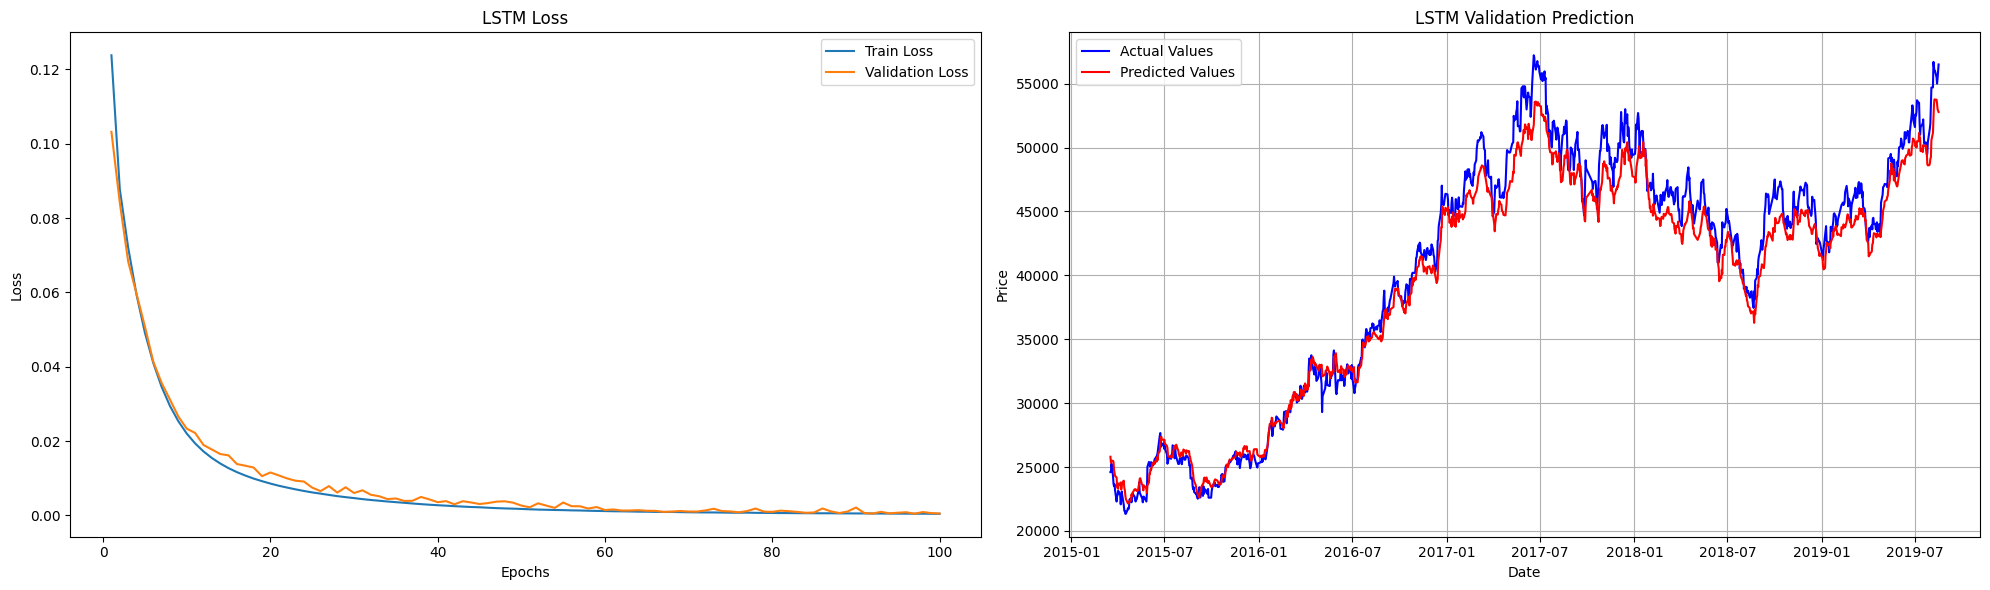

Before Inverse Scaling
MAE: 1289.5371
MSE: 2644674.1446
RMSE: 1626.2454
R²: 0.9731
--------------------
After Inverse Scaling
MAE: 0.0126
MSE: 0.0002
RMSE: 0.0152
R²: 0.9820
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


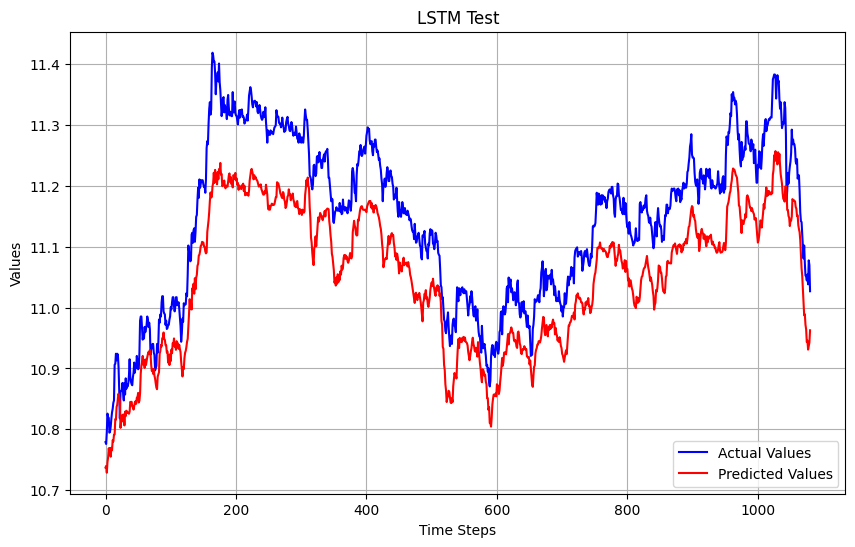

In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps) # 여기 val same, int 바꾸기

y_pred = model_ss_hyper1.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_ss.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_ss, selected_y_test_ss, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_ss_hyper1.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # scaler 바꾸기
y_test = y_scaler_selected_ss.inverse_transform(y_test) # scaler 바꾸기

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 2

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Stock Split", name="hyper2", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/ss_hyper2.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_ss, selected_y_train_ss, time_steps)
X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps)


input_layer = Input(shape=(time_steps, len(ss_features)))

conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

adjusted_pool1 = Dense(128)(pool1)  # pool1을 (batch_size, time_steps//2, 128)로 변경
skip1 = Add()([adjusted_pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
skip2 = Add()([skip1_reshaped, lstm2])

# lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
# skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_ss_hyper2 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_ss_hyper2.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_ss_hyper2.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_ss_hyper2.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_ss_hyper2.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0030 - val_mse: 0.0030 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0032 - val_mse: 0.0032 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 8.1454e-04 - mse: 8.1454e-04 - val_loss: 0.0030 - val_mse: 0.0030 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.7524e-04 - mse: 7.7524e-04 - val_loss: 0.0018 - val_mse: 0.0018 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 6.9306e-04 - mse: 6.9306e-04 - val_loss: 0.0010 - val_mse: 0.0010 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 4.5264e-04 - mse: 4.5264e-04 - val_loss: 0.0014 - val_mse: 0.0014 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.0016e-04 - mse: 

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36            │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_36 (Conv1D)        │ (None, 88, 64)         │          3,328 │ input_layer_36[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_36          │ (None, 44, 64)         │              0 │ conv1d_36[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_137 (Dense)         │ (None, 44, 128)        │          8,320 │ max_pooling1d_36[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_71 (LSTM)            │ (None, 44, 128)        │         98,816 │ max_pooling1d_36[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_44 (Add)              │ (None, 44, 128)        │              0 │ dense_137[0][0],       │
│                           │                        │                │ lstm_71[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 5632)           │              0 │ add_44[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_138 (Dense)         │ (None, 64)             │        360,512 │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_72 (LSTM)            │ (None, 64)             │         49,408 │ add_44[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_45 (Add)              │ (None, 64)             │              0 │ dense_138[0][0],       │
│                           │                        │                │ lstm_72[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_139 (Dense)         │ (None, 64)             │          4,160 │ add_45[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_141 (Dense)         │ (None, 1)              │             65 │ dense_139[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,573,829 (6.00 MB)

 Trainable params: 524,609 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,049,220 (4.00 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


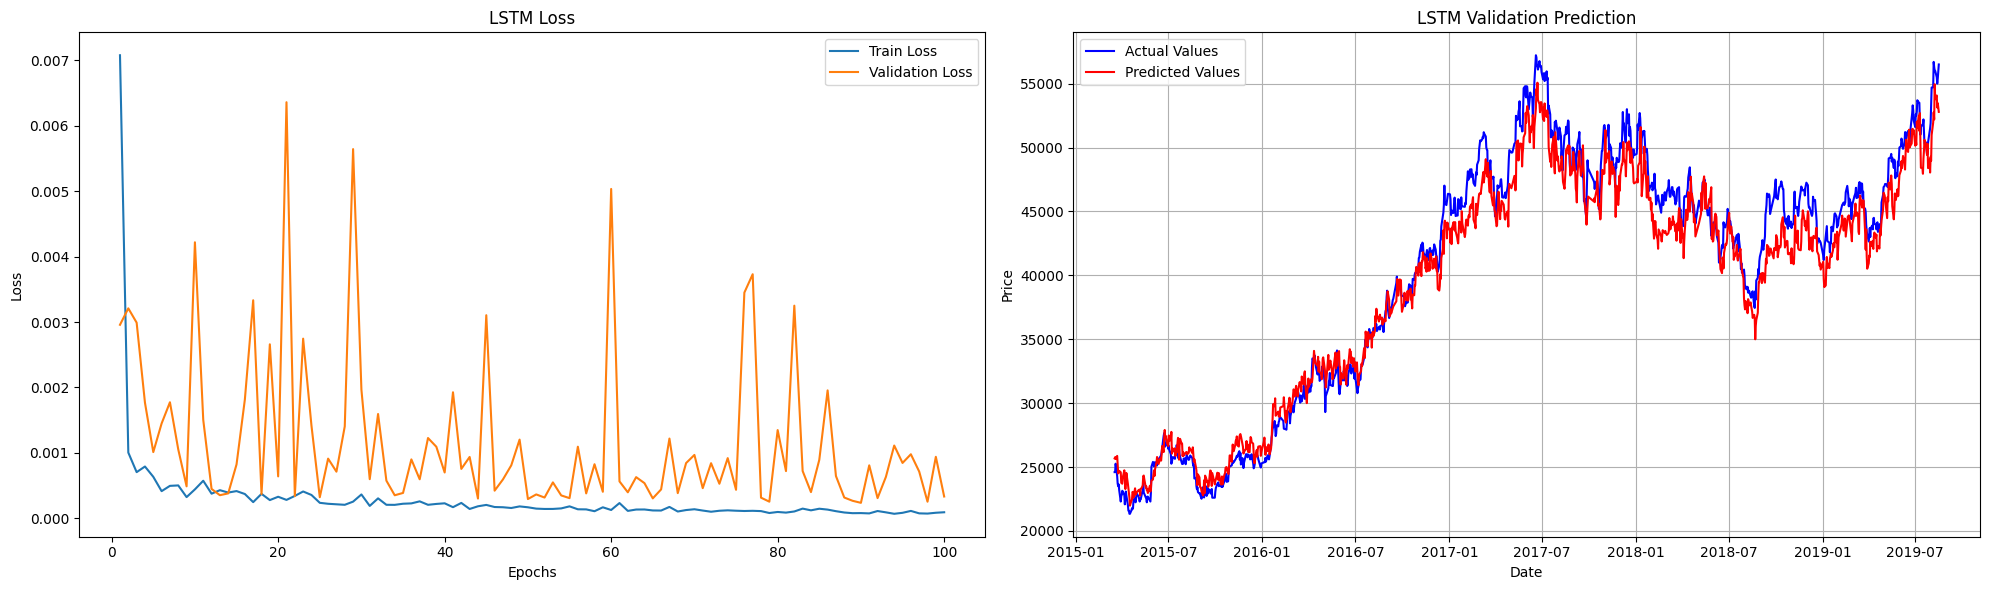

Before Inverse Scaling
MAE: 1514.7285
MSE: 3538666.8625
RMSE: 1881.1345
R²: 0.9640
--------------------
After Inverse Scaling
MAE: 0.0152
MSE: 0.0003
RMSE: 0.0182
R²: 0.9742
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


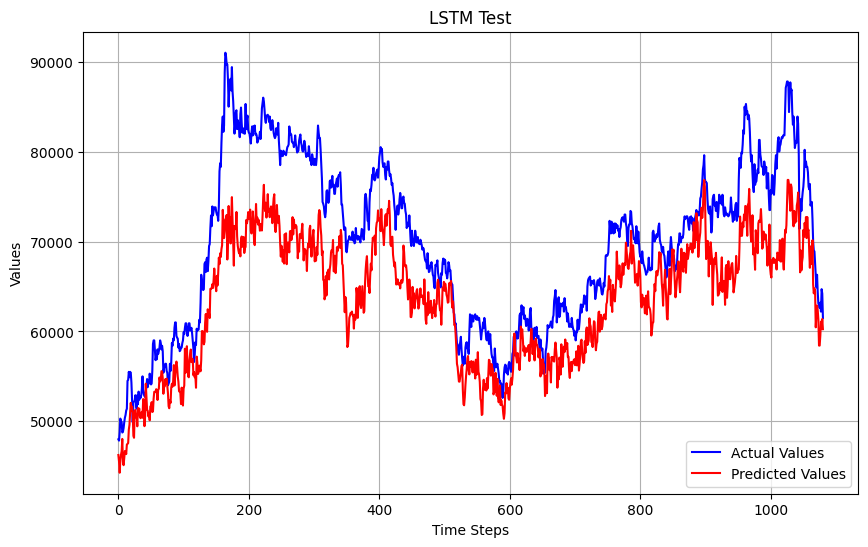

Before Inverse Scaling
MAE: 6130.8364
MSE: 49688049.0300
RMSE: 7048.9750
R²: 0.4254
--------------------
After Inverse Scaling
MAE: 0.0369
MSE: 0.0017
RMSE: 0.0412
R²: 0.4663


In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps) # 여기 val same, int 바꾸기

y_pred = model_ss_hyper2.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_ss.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_ss, selected_y_test_ss, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_ss_hyper2.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_test, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_test = y_scaler_selected_ss.inverse_transform(y_test) # scaler 바꾸기
y_test = np.round(np.exp(y_test), 4)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_test , y_pred )
rmse = np.sqrt(mean_squared_error(y_test , y_pred ))
mae = mean_absolute_error(y_test , y_pred )
r2 = r2_score(y_test , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

##### 3

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Stock Split", name="hyper3", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/ss_hyper3.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_ss, selected_y_train_ss, time_steps)
X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps)


input_layer = Input(shape=(time_steps, len(ss_features)))

conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

adjusted_pool1 = Dense(128)(pool1)  # pool1을 (batch_size, time_steps//2, 128)로 변경
skip1 = Add()([adjusted_pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
skip2 = Add()([skip1_reshaped, lstm2])

# lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
# skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_ss_hyper3 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_ss_hyper3.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_ss_hyper3.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_ss_hyper3.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_ss_hyper3.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0010 - val_mse: 0.0010 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 6.5470e-04 - val_mse: 6.5470e-04 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.1650e-04 - mse: 8.1650e-04 - val_loss: 7.4280e-04 - val_mse: 7.4280e-04 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.9018e-04 - mse: 6.9018e-04 - val_loss: 8.9215e-04 - val_mse: 8.9215e-04 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 5.1417e-04 - mse: 5.1417e-04 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 5.4146e-04 - mse: 5.4146e-04 - val_loss: 0.0012 - val_mse: 0.0012 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - 

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_41            │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_41 (Conv1D)        │ (None, 88, 64)         │          3,328 │ input_layer_41[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_41          │ (None, 44, 64)         │              0 │ conv1d_41[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_159 (Dense)         │ (None, 44, 128)        │          8,320 │ max_pooling1d_41[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_83 (LSTM)            │ (None, 44, 128)        │         98,816 │ max_pooling1d_41[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_54 (Add)              │ (None, 44, 128)        │              0 │ dense_159[0][0],       │
│                           │                        │                │ lstm_83[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_9 (Flatten)       │ (None, 5632)           │              0 │ add_54[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_160 (Dense)         │ (None, 64)             │        360,512 │ flatten_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_84 (LSTM)            │ (None, 64)             │         49,408 │ add_54[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_55 (Add)              │ (None, 64)             │              0 │ dense_160[0][0],       │
│                           │                        │                │ lstm_84[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_161 (Dense)         │ (None, 64)             │          4,160 │ add_55[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_163 (Dense)         │ (None, 1)              │             65 │ dense_161[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,573,829 (6.00 MB)

 Trainable params: 524,609 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,049,220 (4.00 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


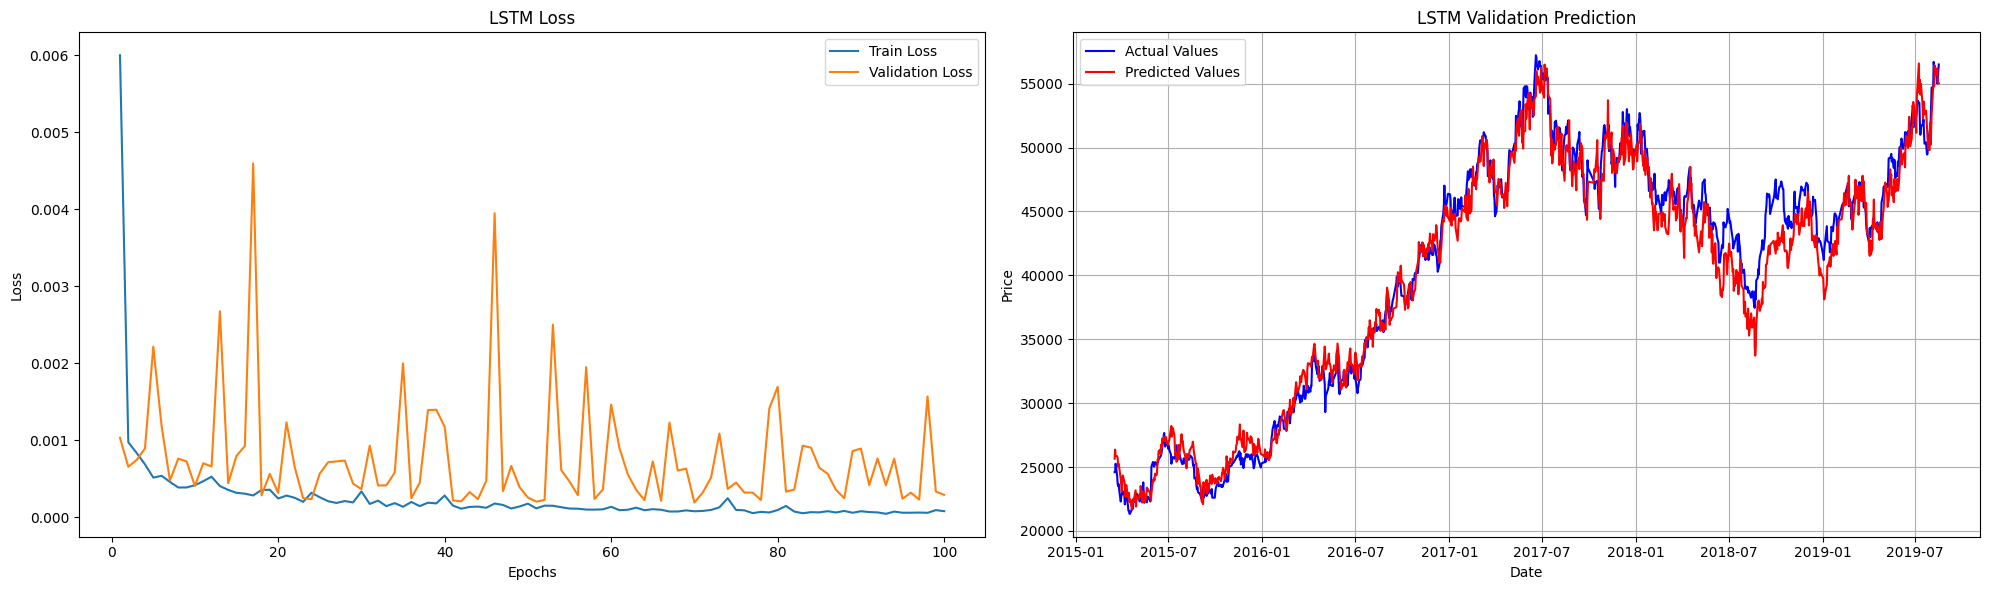

Before Inverse Scaling
MAE: 1278.8754
MSE: 2723594.1067
RMSE: 1650.3315
R²: 0.9723
--------------------
After Inverse Scaling
MAE: 0.0134
MSE: 0.0003
RMSE: 0.0170
R²: 0.9775
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


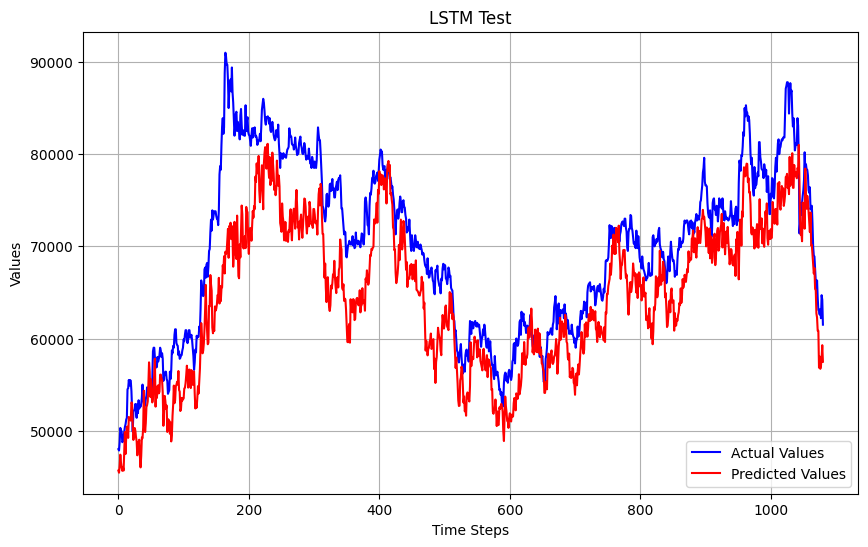

Before Inverse Scaling
MAE: 5141.0524
MSE: 37140727.1439
RMSE: 6094.3193
R²: 0.5705
--------------------
After Inverse Scaling
MAE: 0.0313
MSE: 0.0013
RMSE: 0.0362
R²: 0.5879


In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps) # 여기 val same, int 바꾸기

y_pred = model_ss_hyper3.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_ss.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_ss, selected_y_test_ss, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_ss_hyper3.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_test, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_test = y_scaler_selected_ss.inverse_transform(y_test) # scaler 바꾸기
y_test = np.round(np.exp(y_test), 4)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_test , y_pred )
rmse = np.sqrt(mean_squared_error(y_test , y_pred ))
mae = mean_absolute_error(y_test , y_pred )
r2 = r2_score(y_test , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

##### 4

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Stock Split", name="hyper4", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/ss_hyper4.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_ss, selected_y_train_ss, time_steps)
X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps)


input_layer = Input(shape=(time_steps, len(ss_features)))

conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

adjusted_pool1 = Dense(128)(pool1)  # pool1을 (batch_size, time_steps//2, 128)로 변경
skip1 = Add()([adjusted_pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
skip2 = Add()([skip1_reshaped, lstm2])

# lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
# skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_ss_hyper4 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_ss_hyper4.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_ss_hyper4.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_ss_hyper4.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_ss_hyper4.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2789 - mse: 0.2789 - val_loss: 0.0028 - val_mse: 0.0028 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0011 - val_mse: 0.0011 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 8.9666e-04 - val_mse: 8.9666e-04 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 8.5888e-04 - val_mse: 8.5888e-04 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 7.4157e-04 - val_mse: 7.4157e-04 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 6.7532e-04 - val_mse: 6.7532e-04 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.7204e-04 - mse: 8.7204e-04 - v

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_42            │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_42 (Conv1D)        │ (None, 88, 64)         │          3,328 │ input_layer_42[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_42          │ (None, 44, 64)         │              0 │ conv1d_42[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_164 (Dense)         │ (None, 44, 128)        │          8,320 │ max_pooling1d_42[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_85 (LSTM)            │ (None, 44, 128)        │         98,816 │ max_pooling1d_42[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_56 (Add)              │ (None, 44, 128)        │              0 │ dense_164[0][0],       │
│                           │                        │                │ lstm_85[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_10 (Flatten)      │ (None, 5632)           │              0 │ add_56[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_165 (Dense)         │ (None, 64)             │        360,512 │ flatten_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_86 (LSTM)            │ (None, 64)             │         49,408 │ add_56[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_57 (Add)              │ (None, 64)             │              0 │ dense_165[0][0],       │
│                           │                        │                │ lstm_86[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_166 (Dense)         │ (None, 64)             │          4,160 │ add_57[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_168 (Dense)         │ (None, 1)              │             65 │ dense_166[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,573,829 (6.00 MB)

 Trainable params: 524,609 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,049,220 (4.00 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


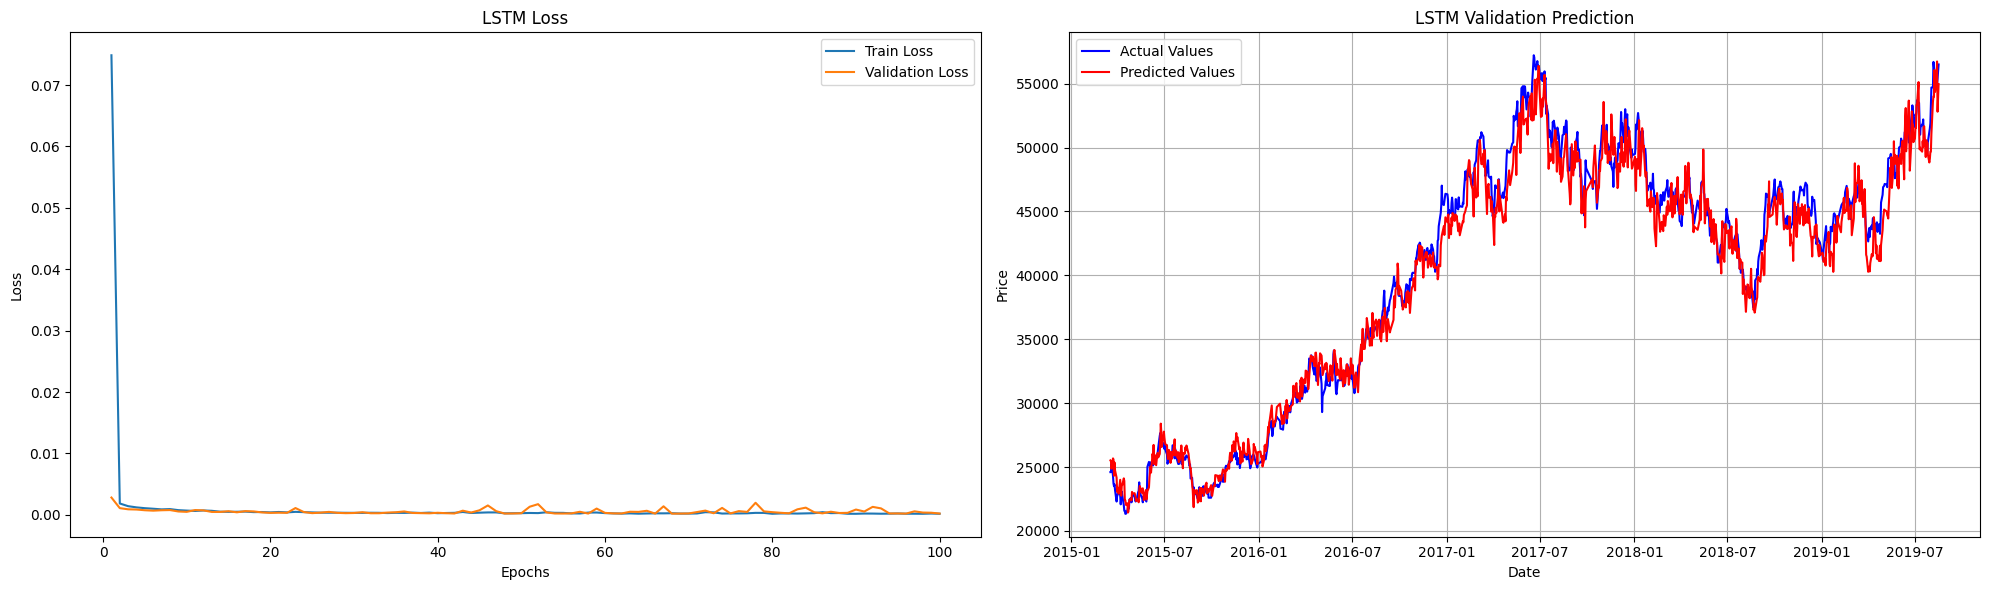

Before Inverse Scaling
MAE: 1150.6460
MSE: 2206164.8542
RMSE: 1485.3164
R²: 0.9776
--------------------
After Inverse Scaling
MAE: 0.0116
MSE: 0.0002
RMSE: 0.0144
R²: 0.9838
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


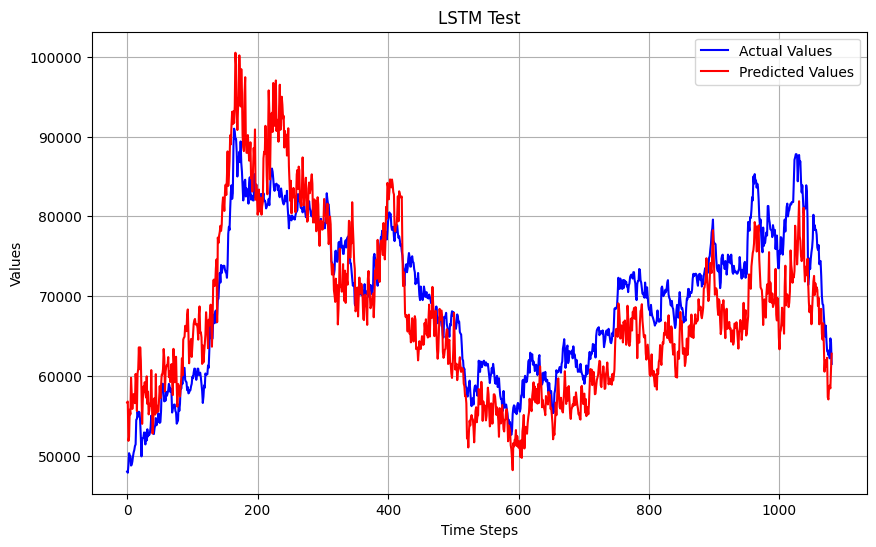

Before Inverse Scaling
MAE: 4939.3184
MSE: 32604790.4282
RMSE: 5710.0605
R²: 0.6229
--------------------
After Inverse Scaling
MAE: 0.0298
MSE: 0.0012
RMSE: 0.0341
R²: 0.6346


In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps) # 여기 val same, int 바꾸기

y_pred = model_ss_hyper4.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_ss.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_ss, selected_y_test_ss, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_ss_hyper4.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_test, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_test = y_scaler_selected_ss.inverse_transform(y_test) # scaler 바꾸기
y_test = np.round(np.exp(y_test), 4)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_test , y_pred )
rmse = np.sqrt(mean_squared_error(y_test , y_pred ))
mae = mean_absolute_error(y_test , y_pred )
r2 = r2_score(y_test , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

모델 불러오기

In [74]:
wandb.finish()

In [75]:
wandb.init(project="LSTM Fin - Stock Split", name="hyper4", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

In [76]:
time_steps=90

In [77]:
input_layer = Input(shape=(time_steps, len(ss_features)))

conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

adjusted_pool1 = Dense(128)(pool1)  # pool1을 (batch_size, time_steps//2, 128)로 변경
skip1 = Add()([adjusted_pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
skip2 = Add()([skip1_reshaped, lstm2])

# lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
# skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_ss_hyper4 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_ss_hyper4.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

In [78]:
model_ss_hyper4.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/ss_hyper4.weights.h5')
model_ss_hyper4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 88, 64)         │          3,328 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 44, 64)         │              0 │ conv1d_5[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 44, 128)        │          8,320 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_10 (LSTM)            │ (None, 44, 128)        │         98,816 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 44, 128)        │              0 │ dense_24[0][0],        │
│                           │                        │                │ lstm_10[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 5632)           │              0 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 64)             │        360,512 │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_11 (LSTM)            │ (None, 64)             │         49,408 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 64)             │              0 │ dense_25[0][0],        │
│                           │                        │                │ lstm_11[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 64)             │          4,160 │ add_10[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 1)              │             65 │ dense_26[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 524,609 (2.00 MB)

 Trainable params: 524,609 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Day 1 Prediction: [[62779.523]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Day 2 Prediction: [[59252.766]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Day 3 Prediction: [[57811.11]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Day 4 Prediction: [[55687.83]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Day 5 Prediction: [[55023.723]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Day 6 Prediction: [[57003.54]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Day 7 Prediction: [[59158.3]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Day 8 Prediction: [[58782.188]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Day 9 Prediction: [[58417.42]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Day 10 Prediction: [[56184.844]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Day 11 Prediction: [[58238.754]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Day 12 Prediction: [[56205.477]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Day 13 Prediction: [[57449.03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Day 14 Prediction: [[58041.695]]
1/1 ━━━━━━━━━━━━━━━━━━

<ipython-input-185-f68a4648108a>:3: RuntimeWarning: overflow encountered in exp
  y_test_rever = np.exp(y_test_rever)


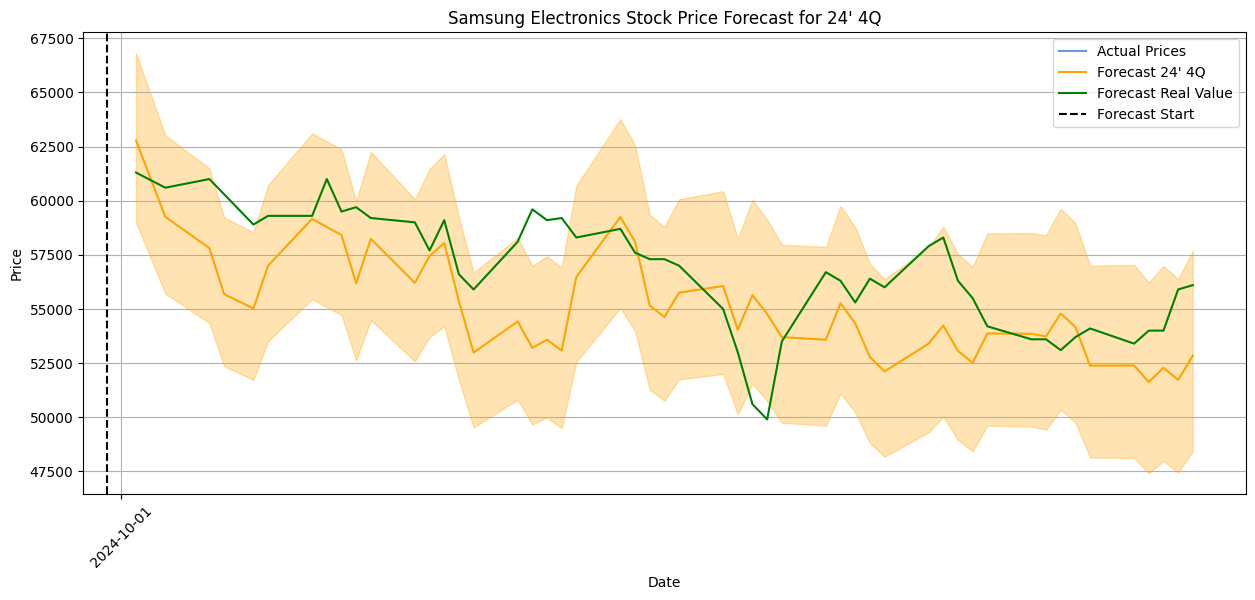

In [ ]:
future_90_days, upper_90_days, lower_90_days = predict_future_dynamic(model_ss_hyper4, X_test, y_scaler_selected_ss, steps=51, feature_generator=feature_generator)
y_test_rever = y_scaler_selected_ss.inverse_transform(y_test[:len(test_dates)])
y_test_rever = np.exp(y_test_rever)

future_90_days_rever = y_scaler_selected_ss.inverse_transform(future_90_days.reshape(-1, 1))
future_90_days_rever = np.exp(future_90_days_rever)

upper_90_days_rever = y_scaler_selected_ss.inverse_transform(upper_90_days.reshape(-1, 1))
upper_90_days_rever = np.exp(upper_90_days_rever)

lower_90_days_rever = y_scaler_selected_ss.inverse_transform(lower_90_days.reshape(-1, 1))
lower_90_days_rever = np.exp(lower_90_days_rever)

plt.figure(figsize=(15, 6))
plt.plot(test_dates[:len(y_test_rever)], y_test_rever, label='Actual Prices', color='#689ADB')
plt.plot(future_dates[:len(future_90_days_rever)], future_90_days_rever[:len(future_dates)], label='Forecast 24\' 4Q', color='orange')
plt.plot(real_close.index, real_close.values, label='Forecast Real Value', color='green')
plt.fill_between(
    future_dates[:len(future_90_days_rever)],
    upper_90_days_rever.ravel(),
    lower_90_days_rever.ravel(),
    color='orange', alpha=0.3
)
forecast_start_date = test_dates.iloc[-1]
plt.axvline(x=forecast_start_date, color='black', linestyle='--', label='Forecast Start')

plt.title('Samsung Electronics Stock Price Forecast for 24\' 4Q')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
################### Test #######################
X_test, y_test = create_sequences(selected_x_test_ss, selected_y_test_ss, wandb.config.time_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Day 1 Prediction: [[65327.957]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Day 2 Prediction: [[61800.91]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Day 3 Prediction: [[58988.055]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Day 4 Prediction: [[58440.996]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Day 5 Prediction: [[57398.652]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Day 6 Prediction: [[60239.9]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Day 7 Prediction: [[61949.324]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Day 8 Prediction: [[61100.016]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Day 9 Prediction: [[60401.316]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Day 10 Prediction: [[57760.355]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Day 11 Prediction: [[58684.16]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Day 12 Prediction: [[56017.43]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Day 13 Prediction: [[58735.055]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Day 14 Prediction: [[60415.6]]
1/1 ━━━━━━━━━━━━━━━━━━

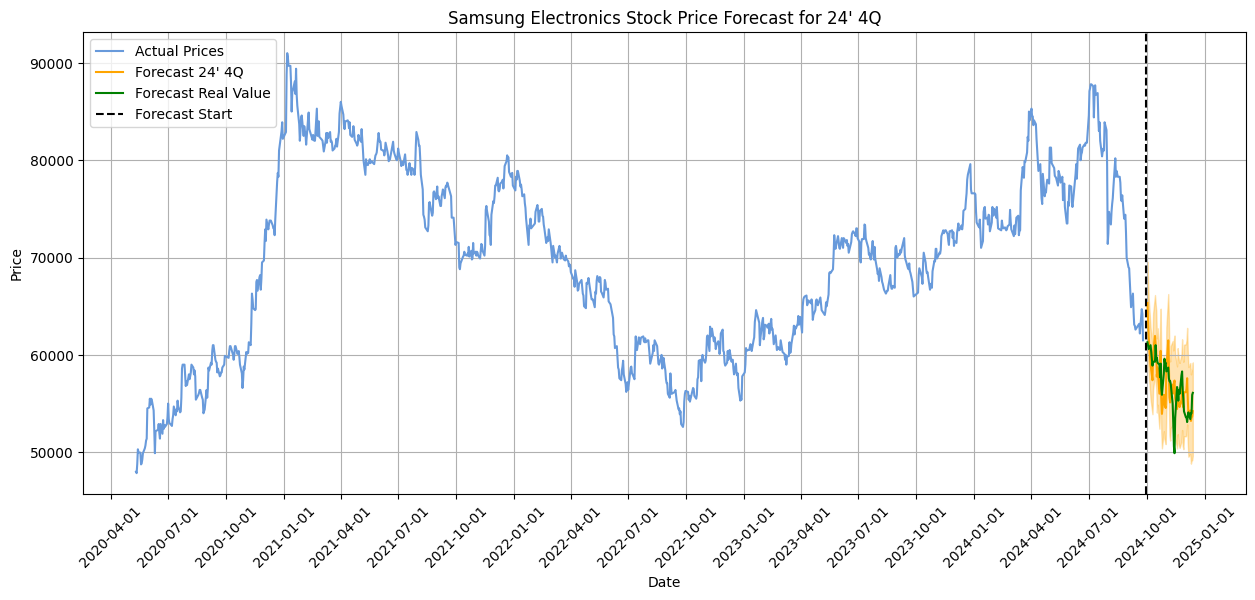

In [ ]:
future_90_days, upper_90_days, lower_90_days = predict_future_dynamic(model_ss_hyper4, X_test, y_scaler_selected_ss, steps=51, feature_generator=feature_generator)
y_test_rever = y_scaler_selected_ss.inverse_transform(y_test[:len(test_dates)])
y_test_rever = np.exp(y_test_rever)

future_90_days_rever = y_scaler_selected_ss.inverse_transform(future_90_days.reshape(-1, 1))
future_90_days_rever = np.exp(future_90_days_rever)

upper_90_days_rever = y_scaler_selected_ss.inverse_transform(upper_90_days.reshape(-1, 1))
upper_90_days_rever = np.exp(upper_90_days_rever)

lower_90_days_rever = y_scaler_selected_ss.inverse_transform(lower_90_days.reshape(-1, 1))
lower_90_days_rever = np.exp(lower_90_days_rever)

plt.figure(figsize=(15, 6))
plt.plot(test_dates[:len(y_test_rever)], y_test_rever, label='Actual Prices', color='#689ADB')
plt.plot(future_dates[:len(future_90_days_rever)], future_90_days_rever[:len(future_dates)], label='Forecast 24\' 4Q', color='orange')
plt.plot(real_close.index, real_close.values, label='Forecast Real Value', color='green')
plt.fill_between(
    future_dates[:len(future_90_days_rever)],
    upper_90_days_rever.ravel(),
    lower_90_days_rever.ravel(),
    color='orange', alpha=0.3
)
forecast_start_date = test_dates.iloc[-1]
plt.axvline(x=forecast_start_date, color='black', linestyle='--', label='Forecast Start')

plt.title('Samsung Electronics Stock Price Forecast for 24\' 4Q')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Day 1 Prediction: [[65327.957]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Day 2 Prediction: [[61800.91]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Day 3 Prediction: [[58988.055]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Day 4 Prediction: [[58440.996]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Day 5 Prediction: [[57398.652]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Day 6 Prediction: [[60239.9]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Day 7 Prediction: [[61949.324]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Day 8 Prediction: [[61100.016]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Day 9 Prediction: [[60401.316]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Day 10 Prediction: [[57760.355]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Day 11 Prediction: [[58684.16]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Day 12 Prediction: [[56017.43]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Day 13 Prediction: [[58735.055]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Day 14 Prediction: [[60415.6]]
1/1 ━━━━━━━━━━━━━━━━━━

<ipython-input-85-19bde1e3c448>:3: RuntimeWarning: overflow encountered in exp
  y_test_rever = np.exp(y_test_rever)


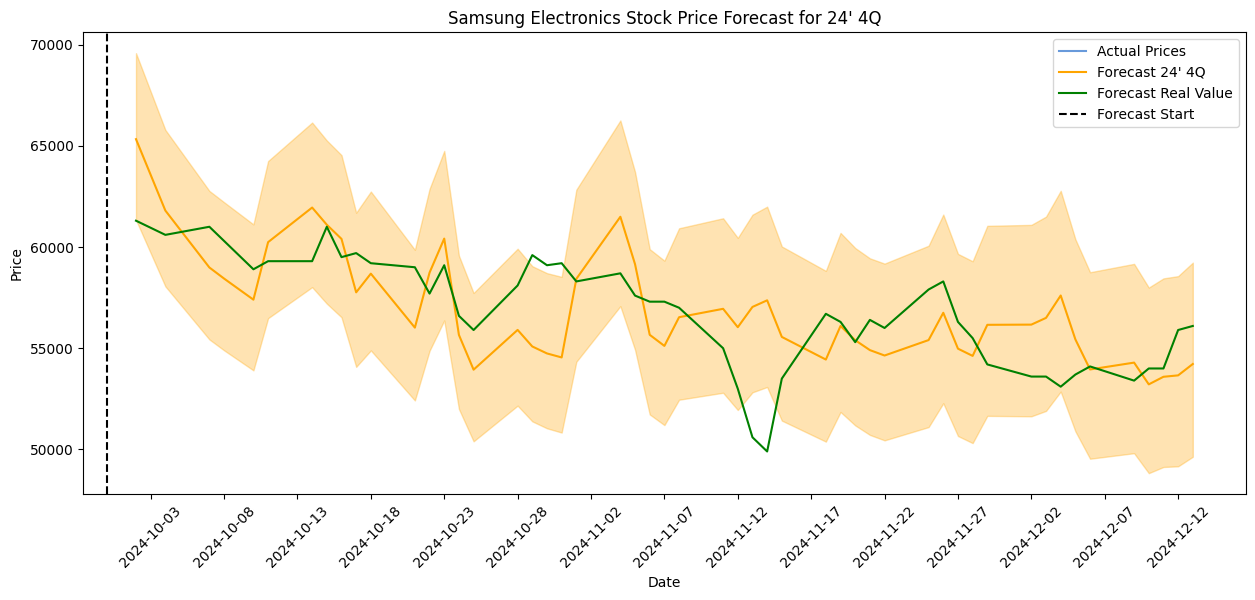

In [85]:
future_90_days, upper_90_days, lower_90_days = predict_future_dynamic(model_ss_hyper4, X_test, y_scaler_selected_ss, steps=51, feature_generator=feature_generator)
y_test_rever = y_scaler_selected_ss.inverse_transform(y_test[:len(test_dates)])
y_test_rever = np.exp(y_test_rever)

future_90_days_rever = y_scaler_selected_ss.inverse_transform(future_90_days.reshape(-1, 1))
future_90_days_rever = np.exp(future_90_days_rever)

upper_90_days_rever = y_scaler_selected_ss.inverse_transform(upper_90_days.reshape(-1, 1))
upper_90_days_rever = np.exp(upper_90_days_rever)

lower_90_days_rever = y_scaler_selected_ss.inverse_transform(lower_90_days.reshape(-1, 1))
lower_90_days_rever = np.exp(lower_90_days_rever)

plt.figure(figsize=(15, 6))
plt.plot(test_dates[:len(y_test_rever)][-20:], y_test_rever[-20:], label='Actual Prices', color='#689ADB')
plt.plot(future_dates[:len(future_90_days_rever)], future_90_days_rever[:len(future_dates)], label='Forecast 24\' 4Q', color='orange')
plt.plot(real_close.index, real_close.values, label='Forecast Real Value', color='green')
plt.fill_between(
    future_dates[:len(future_90_days_rever)],
    upper_90_days_rever.ravel(),
    lower_90_days_rever.ravel(),
    color='orange', alpha=0.3
)
forecast_start_date = test_dates.iloc[-1]
plt.axvline(x=forecast_start_date, color='black', linestyle='--', label='Forecast Start')

plt.title('Samsung Electronics Stock Price Forecast for 24\' 4Q')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


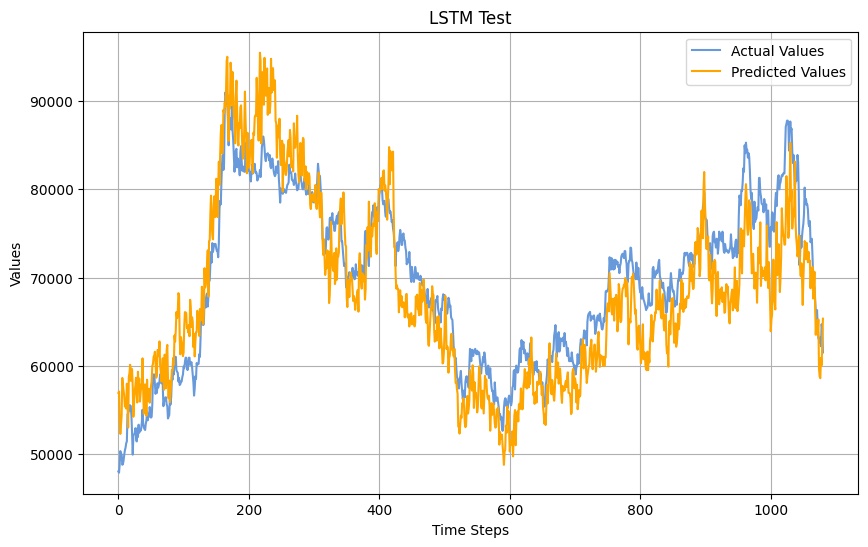

Before Inverse Scaling
MAE: 4086.9692
MSE: 23272023.4631
RMSE: 4824.1086
R²: 0.7309
--------------------
After Inverse Scaling
MAE: 0.0247
MSE: 0.0008
RMSE: 0.0289
R²: 0.7371


In [96]:
################### Test #######################
X_test, y_test = create_sequences(selected_x_test_ss, selected_y_test_ss, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_ss_hyper4.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_test, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_test = y_scaler_selected_ss.inverse_transform(y_test) # scaler 바꾸기
y_test = np.round(np.exp(y_test), 4)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = '#689ADB')
plt.plot(y_pred, label='Predicted Values', color = 'orange')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_test , y_pred )
rmse = np.sqrt(mean_squared_error(y_test , y_pred ))
mae = mean_absolute_error(y_test , y_pred )
r2 = r2_score(y_test , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

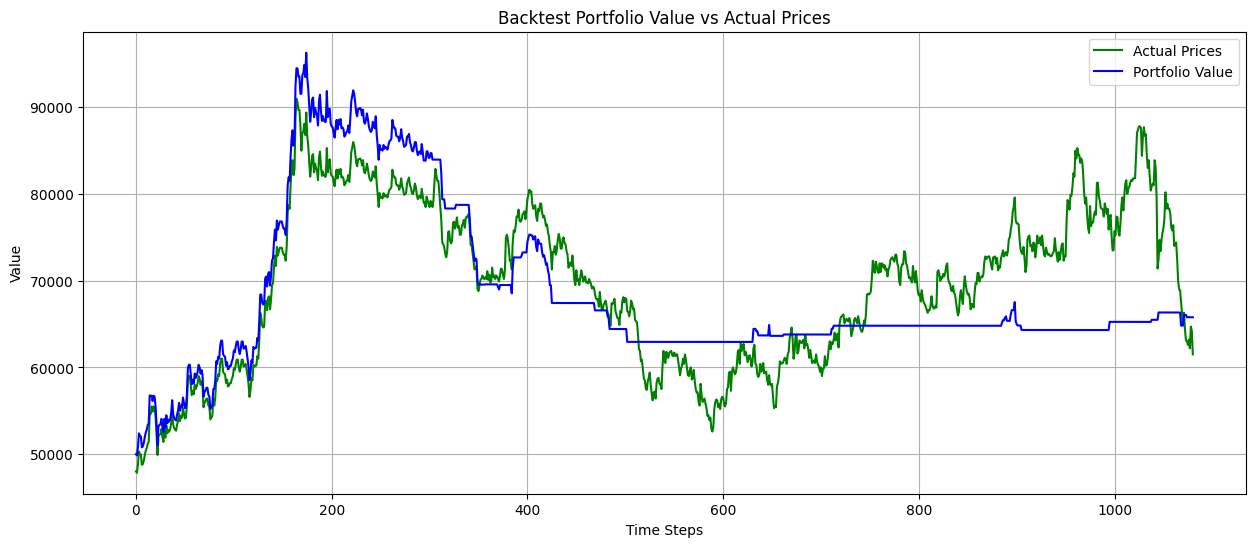

In [107]:
def backtest_with_korea_fees(y_pred, y_test, initial_capital=50000):
    """
    한국 주식 시장 기준 거래 비용 적용 백테스트
    - 매수 시: 0.01% 수수료
    - 매도 시: 0.01% 수수료 + 0.23% 거래세
    """
    portfolio_value = initial_capital
    cash = initial_capital
    positions = 0  # 보유 주식 수
    daily_values = []

    for i in range(len(y_pred)):
        # 매수: 예측값이 실제값보다 높을 때
        if y_pred[i] > y_test[i] and cash > 0:
            buy_price = y_test[i]
            shares_to_buy = cash / (buy_price * 1.0001)  # 매수 시 0.01% 수수료
            cash -= shares_to_buy * buy_price * 1.0001
            positions += shares_to_buy

        # 매도: 예측값이 실제값보다 낮을 때
        elif y_pred[i] < y_test[i] and positions > 0:
            sell_price = y_test[i]
            cash += positions * sell_price * 0.9976  # 매도 시 0.24% (0.01% 수수료 + 0.23% 거래세)
            positions = 0

        # 포트폴리오 가치 계산
        portfolio_value = cash + positions * y_test[i]
        daily_values.append(portfolio_value)

    return daily_values


# 백테스트 실행
backtest_values = backtest_with_korea_fees(y_pred.ravel(), y_test.ravel())

# 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Prices', color='green')
plt.plot(range(len(backtest_values)), backtest_values, label='Portfolio Value', color='blue')
plt.title('Backtest Portfolio Value vs Actual Prices')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [89]:
print(f"Length of predictions: {len(future_90_days_rever.ravel())}")
print(f"Length of actual_prices: {len(real_close.values.ravel())}")

Length of predictions: 51
Length of actual_prices: 51


In [ ]:
wandb.finish()

##### 5

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Fin - Stock Split", name="hyper5", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128,128],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/ss_hyper5.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_ss, selected_y_train_ss, time_steps)
X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps)


input_layer = Input(shape=(time_steps, len(ss_features)))

conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0005), return_sequences=True)(pool1)

adjusted_pool1 = Dense(128)(pool1)  # pool1을 (batch_size, time_steps//2, 128)로 변경
skip1 = Add()([adjusted_pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
skip2 = Add()([skip1_reshaped, lstm2])

# lstm2_adjusted = Dense(wandb.config.lstm_units[0])(lstm2)
# skip2 = Add()([lstm1, lstm2_adjusted])

dense1 = Dense(64, activation='relu')(skip2)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_ss_hyper5 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_ss_hyper5.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_ss_hyper5.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_ss_hyper5.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_ss_hyper5.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.1064 - mse: 0.0523 - val_loss: 0.0510 - val_mse: 0.0040 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0460 - mse: 0.0012 - val_loss: 0.0395 - val_mse: 8.8716e-04 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0378 - mse: 9.8941e-04 - val_loss: 0.0340 - val_mse: 0.0021 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0316 - mse: 0.0012 - val_loss: 0.0282 - val_mse: 0.0018 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0259 - mse: 6.8313e-04 - val_loss: 0.0247 - val_mse: 0.0026 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mse: 5.6858e-04 - val_loss: 0.0267 - val_mse: 0.0081 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0187 - mse: 7.9159e-04 - val_lo

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 90, 17)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 88, 64)         │          3,328 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 44, 64)         │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 44, 128)        │          8,320 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ (None, 44, 128)        │         98,816 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 44, 128)        │              0 │ dense_19[0][0],        │
│                           │                        │                │ lstm_8[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 5632)           │              0 │ add_7[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 128)            │        721,024 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_9 (LSTM)             │ (None, 128)            │        131,584 │ add_7[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 128)            │              0 │ dense_20[0][0],        │
│                           │                        │                │ lstm_9[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 64)             │          8,256 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 1)              │             65 │ dense_21[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,914,181 (11.12 MB)

 Trainable params: 971,393 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,942,788 (7.41 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


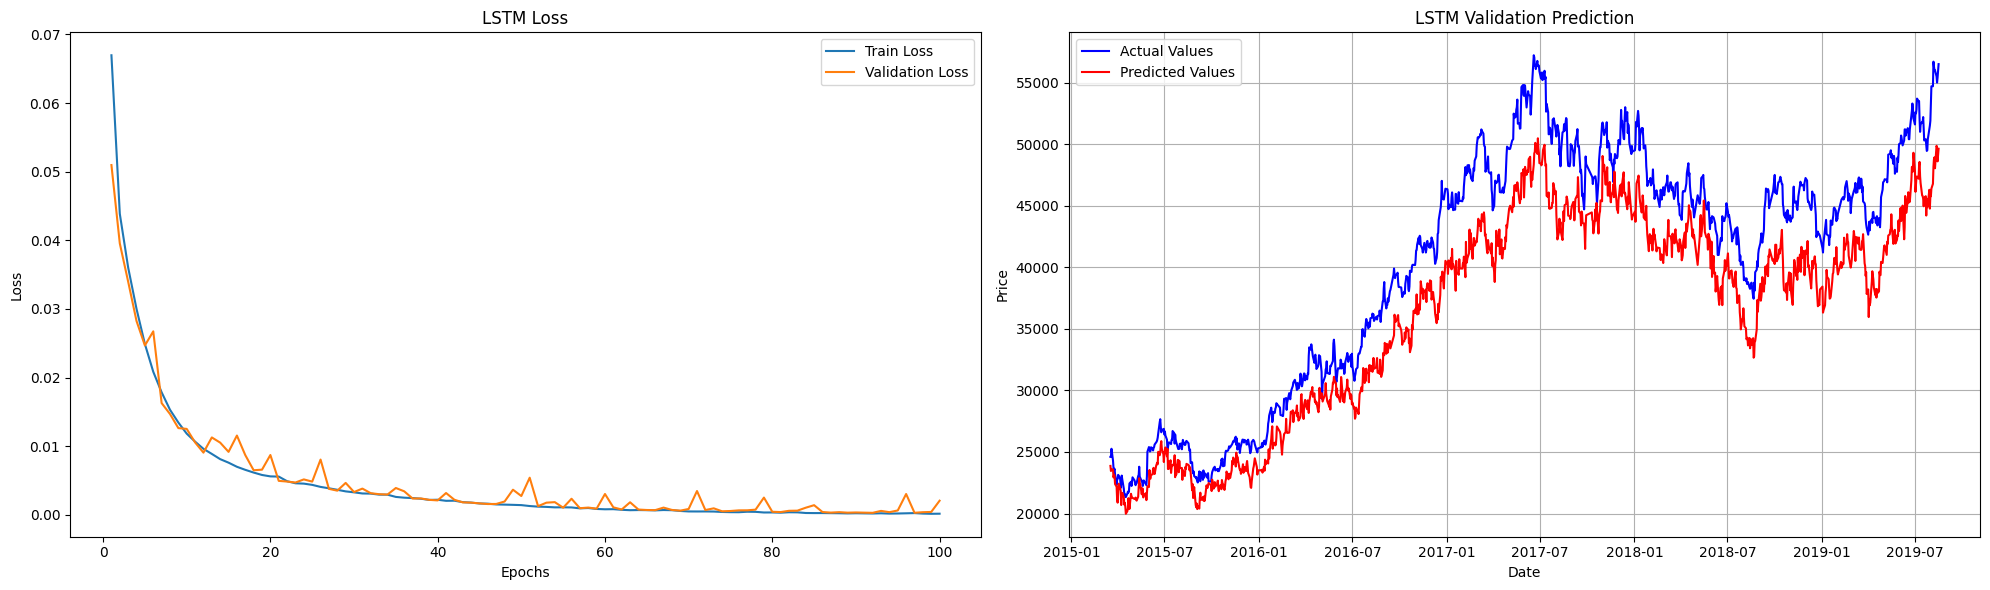

Before Inverse Scaling
MAE: 4043.5559
MSE: 19895394.3807
RMSE: 4460.4254
R²: 0.7978
--------------------
After Inverse Scaling
MAE: 0.0421
MSE: 0.0020
RMSE: 0.0445
R²: 0.8459
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


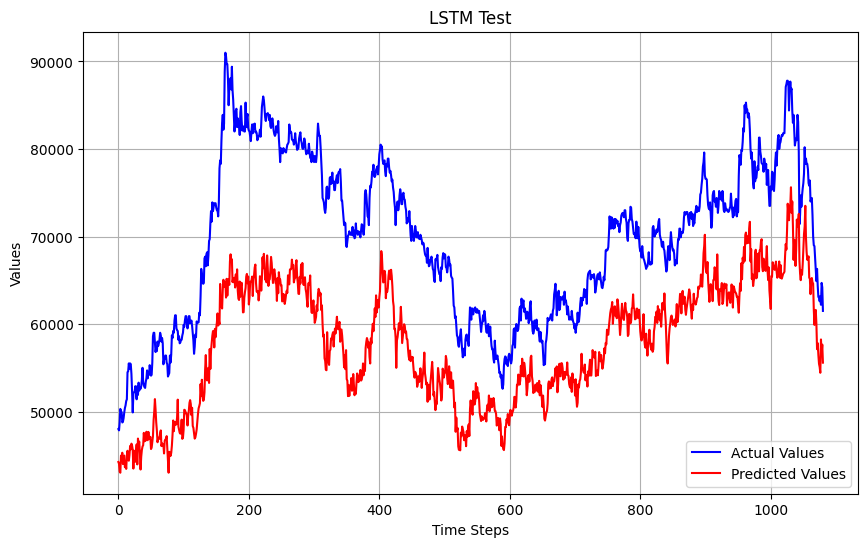

Before Inverse Scaling
MAE: 11834.7192
MSE: 156841006.5534
RMSE: 12523.6179
R²: -0.8139
--------------------
After Inverse Scaling
MAE: 0.0762
MSE: 0.0063
RMSE: 0.0794
R²: -0.9825


In [ ]:
#################### Loss and Val Predict #####################
plt.figure(figsize = (20,6))

epochs = list(range(1, wandb.config.epochs + 1))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

X_val, y_val = create_sequences(selected_x_val_ss, selected_y_val_ss, time_steps) # 여기 val same, int 바꾸기

y_pred = model_ss_hyper5.predict(X_val) # 여기 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_val, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # 여기 scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_val = y_scaler_selected_ss.inverse_transform(y_val) # 여기 scaler 바꾸기
y_val = np.round(np.exp(y_val), 4)

plt.subplot(1,2,2)
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_val), label='Actual Values', color = 'blue')
plt.plot(int_df[features][3518:4601].index, np.squeeze(y_pred), label='Predicted Values', color = 'red')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

################### Test #######################
X_test, y_test = create_sequences(selected_x_test_ss, selected_y_test_ss, wandb.config.time_steps) # same, int data 바꾸기

y_pred = model_ss_hyper5.predict(X_test) # 모델 이름 바꾸기
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]
a,b = y_test, y_pred
y_pred = y_scaler_selected_ss.inverse_transform(y_pred) # scaler 바꾸기
y_pred = np.round(np.exp(y_pred), 4)

y_test = y_scaler_selected_ss.inverse_transform(y_test) # scaler 바꾸기
y_test = np.round(np.exp(y_test), 4)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color = 'blue')
plt.plot(y_pred, label='Predicted Values', color = 'red')
plt.title('LSTM Test')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

################### Metric Calculation #############################
print("Before Inverse Scaling")
mse = mean_squared_error(y_test , y_pred )
rmse = np.sqrt(mean_squared_error(y_test , y_pred ))
mae = mean_absolute_error(y_test , y_pred )
r2 = r2_score(y_test , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print('-' * 20)
print('After Inverse Scaling')
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")